## 라이브러리 로드

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

%matplotlib inline

## 한글폰트 설정

In [2]:
import matplotlib.pyplot as plt
from IPython.display import set_matplotlib_formats

# Window 의 한글 폰트 설정
# plt.rc('font',family='Malgun Gothic')
# Mac 의 한글 폰트 설정
plt.rc('font', family='AppleGothic') 
plt.rc('axes', unicode_minus=False)

# 레티나 설정을 해주면 글씨가 좀 더 선명하게 보입니다.
set_matplotlib_formats('retina')

In [3]:
# # Google Colab 사용 시 아래 주석을 풀고 폰트설정을 합니다.
# # 로컬 아나콘다 사용 시에는 그대로 주석처리 해놓으시면 됩니다.
# # 나눔고딕 설치
# !apt -qq -y install fonts-nanum > /dev/null

# import matplotlib.font_manager as fm

# fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
# font = fm.FontProperties(fname=fontpath, size=9)
# fm._rebuild()


# # Colab 의 한글 폰트 설정
# plt.rc('font', family='NanumGothic') 

## 데이터 불러오기

In [4]:
df = pd.read_csv("data/NHIS/NHIS_OPEN_GJ_2017.CSV", encoding="cp949")
df.shape

(1000000, 34)

### 데이터 미리보기

In [5]:
df.sample()

기준년도  가입자일련번호  성별코드  연령대코드(5세단위)  시도코드  신장(5Cm단위)  체중(5Kg 단위)  허리둘레  \
231591  2017   231592     1           12    41      165.0        75.0  90.0   

        시력(좌)  시력(우)  ...  감마지티피  흡연상태  음주여부  구강검진 수검여부  치아우식증유무  결손치유무  \
231591    1.2    1.0  ...   24.0   1.0   0.0          1      NaN    NaN   

        치아마모증유무  제3대구치(사랑니)이상   치석   데이터공개일자  
231591      NaN           NaN  1.0  20181126  

[1 rows x 34 columns]

## 기본정보 보기

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 34 columns):
기준년도            1000000 non-null int64
가입자일련번호         1000000 non-null int64
성별코드            1000000 non-null int64
연령대코드(5세단위)     1000000 non-null int64
시도코드            1000000 non-null int64
신장(5Cm단위)       999738 non-null float64
체중(5Kg 단위)      999732 non-null float64
허리둘레            999560 non-null float64
시력(좌)           999712 non-null float64
시력(우)           999721 non-null float64
청력(좌)           999758 non-null float64
청력(우)           999757 non-null float64
수축기혈압           999924 non-null float64
이완기혈압           999923 non-null float64
식전혈당(공복혈당)      999957 non-null float64
총콜레스테롤          999957 non-null float64
트리글리세라이드        999957 non-null float64
HDL콜레스테롤        999956 non-null float64
LDL콜레스테롤        997101 non-null float64
혈색소             999944 non-null float64
요단백             995141 non-null float64
혈청크레아티닌         999956 non-null float64
(혈청지오티)AST   

In [7]:
df.columns

Index(['기준년도', '가입자일련번호', '성별코드', '연령대코드(5세단위)', '시도코드', '신장(5Cm단위)',
       '체중(5Kg 단위)', '허리둘레', '시력(좌)', '시력(우)', '청력(좌)', '청력(우)', '수축기혈압',
       '이완기혈압', '식전혈당(공복혈당)', '총콜레스테롤', '트리글리세라이드', 'HDL콜레스테롤', 'LDL콜레스테롤',
       '혈색소', '요단백', '혈청크레아티닌', '(혈청지오티)AST', '(혈청지오티)ALT', '감마지티피', '흡연상태',
       '음주여부', '구강검진 수검여부', '치아우식증유무', '결손치유무', '치아마모증유무', '제3대구치(사랑니)이상',
       '치석', '데이터공개일자'],
      dtype='object')

In [8]:
df.dtypes

기준년도              int64
가입자일련번호           int64
성별코드              int64
연령대코드(5세단위)       int64
시도코드              int64
신장(5Cm단위)       float64
체중(5Kg 단위)      float64
허리둘레            float64
시력(좌)           float64
시력(우)           float64
청력(좌)           float64
청력(우)           float64
수축기혈압           float64
이완기혈압           float64
식전혈당(공복혈당)      float64
총콜레스테롤          float64
트리글리세라이드        float64
HDL콜레스테롤        float64
LDL콜레스테롤        float64
혈색소             float64
요단백             float64
혈청크레아티닌         float64
(혈청지오티)AST      float64
(혈청지오티)ALT      float64
감마지티피           float64
흡연상태            float64
음주여부            float64
구강검진 수검여부         int64
치아우식증유무         float64
결손치유무           float64
치아마모증유무         float64
제3대구치(사랑니)이상    float64
치석              float64
데이터공개일자           int64
dtype: object

## 결측치 보기

In [9]:
df.isnull().sum()

기준년도                  0
가입자일련번호               0
성별코드                  0
연령대코드(5세단위)           0
시도코드                  0
신장(5Cm단위)           262
체중(5Kg 단위)          268
허리둘레                440
시력(좌)               288
시력(우)               279
청력(좌)               242
청력(우)               243
수축기혈압                76
이완기혈압                77
식전혈당(공복혈당)           43
총콜레스테롤               43
트리글리세라이드             43
HDL콜레스테롤             44
LDL콜레스테롤           2899
혈색소                  56
요단백                4859
혈청크레아티닌              44
(혈청지오티)AST           42
(혈청지오티)ALT           44
감마지티피                45
흡연상태                160
음주여부                525
구강검진 수검여부             0
치아우식증유무         1000000
결손치유무           1000000
치아마모증유무         1000000
제3대구치(사랑니)이상    1000000
치석               601252
데이터공개일자               0
dtype: int64

In [10]:
df.isna().sum()

기준년도                  0
가입자일련번호               0
성별코드                  0
연령대코드(5세단위)           0
시도코드                  0
신장(5Cm단위)           262
체중(5Kg 단위)          268
허리둘레                440
시력(좌)               288
시력(우)               279
청력(좌)               242
청력(우)               243
수축기혈압                76
이완기혈압                77
식전혈당(공복혈당)           43
총콜레스테롤               43
트리글리세라이드             43
HDL콜레스테롤             44
LDL콜레스테롤           2899
혈색소                  56
요단백                4859
혈청크레아티닌              44
(혈청지오티)AST           42
(혈청지오티)ALT           44
감마지티피                45
흡연상태                160
음주여부                525
구강검진 수검여부             0
치아우식증유무         1000000
결손치유무           1000000
치아마모증유무         1000000
제3대구치(사랑니)이상    1000000
치석               601252
데이터공개일자               0
dtype: int64

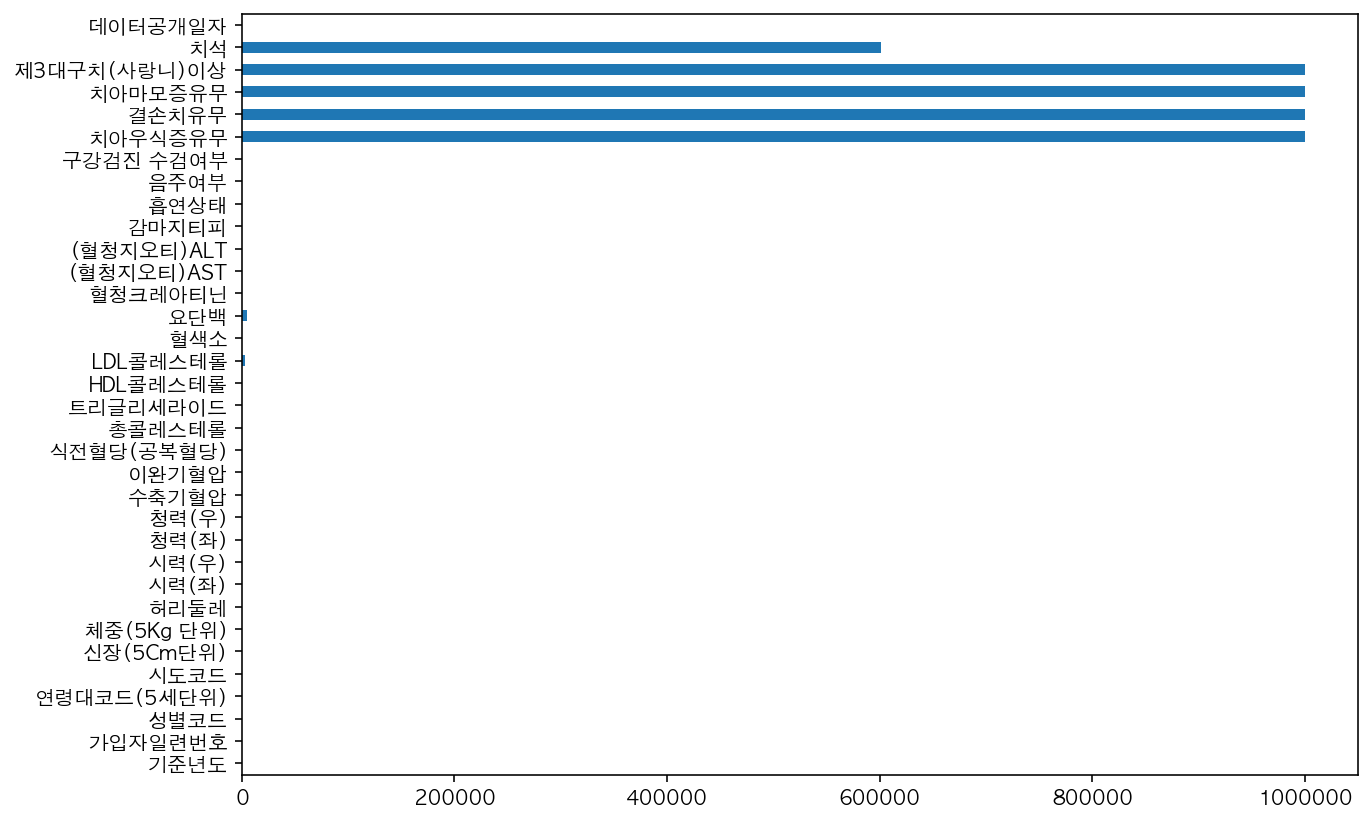

In [11]:
df.isnull().sum().plot.barh(figsize=(10, 7))

## 일부 데이터 요약하기

In [12]:
df[["시력(좌)", "시력(우)"]].head()

시력(좌)  시력(우)
0    1.0    1.2
1    1.2    1.0
2    1.0    0.8
3    0.9    1.0
4    1.5    1.5

In [13]:
df[["시력(좌)", "시력(우)"]].describe()

시력(좌)          시력(우)
count  999712.000000  999721.000000
mean        0.978897       0.976267
std         0.610948       0.605323
min         0.100000       0.100000
25%         0.700000       0.700000
50%         1.000000       1.000000
75%         1.200000       1.200000
max         9.900000       9.900000

## value_counts 로 값 집계하기

In [14]:
df["성별코드"].value_counts()

1    531172
2    468828
Name: 성별코드, dtype: int64

In [15]:
df["흡연상태"].value_counts()

1.0    608587
3.0    215061
2.0    176192
Name: 흡연상태, dtype: int64

## groupby 와 pivot_table 사용하기

### groupby

In [16]:
df.groupby(["성별코드"])["가입자일련번호"].count()

성별코드
1    531172
2    468828
Name: 가입자일련번호, dtype: int64

In [17]:
df.groupby(["성별코드", "흡연상태"])["가입자일련번호"].count()

성별코드  흡연상태
1     1.0     167540
      2.0     164944
      3.0     198636
2     1.0     441047
      2.0      11248
      3.0      16425
Name: 가입자일련번호, dtype: int64

In [18]:
df.groupby(["성별코드", "흡연상태"])["감마지티피"].mean()

성별코드  흡연상태
1     1.0     40.108377
      2.0     48.215069
      3.0     58.344412
2     1.0     22.851237
      2.0     27.598880
      3.0     35.174085
Name: 감마지티피, dtype: float64

In [19]:
df.groupby(["성별코드"])["감마지티피"].describe()

count       mean        std  min   25%   50%   75%    max
성별코드                                                              
1     531154.0  49.446249  61.394872  1.0  21.0  32.0  54.0  999.0
2     468801.0  23.396111  28.831856  1.0  13.0  17.0  24.0  999.0

In [20]:
df.groupby(["성별코드"])["감마지티피"].agg(["mean", "median"])

mean  median
성별코드                   
1     49.446249    32.0
2     23.396111    17.0

In [21]:
df_group = df.groupby(
    ["성별코드", "흡연상태", "음주여부"])["가입자일련번호"].count().reset_index()
df_group.columns = ["성별코드", "흡연상태", "음주여부", "인원수"]
df_group

성별코드  흡연상태  음주여부     인원수
0      1   1.0   0.0   77719
1      1   1.0   1.0   89749
2      1   2.0   0.0   50742
3      1   2.0   1.0  114134
4      1   3.0   0.0   46679
5      1   3.0   1.0  151913
6      2   1.0   0.0  316784
7      2   1.0   1.0  123994
8      2   2.0   0.0    4592
9      2   2.0   1.0    6645
10     2   3.0   0.0    6166
11     2   3.0   1.0   10253

### pivot_table

In [22]:
pd.pivot_table(df, index="성별코드", values="가입자일련번호", aggfunc="count")

가입자일련번호
성별코드         
1      531172
2      468828

In [23]:
pd.pivot_table(df, index="성별코드", values="감마지티피")

감마지티피
성별코드           
1     49.446249
2     23.396111

In [24]:
pd.pivot_table(df, index="성별코드", values="감마지티피", aggfunc="mean")

감마지티피
성별코드           
1     49.446249
2     23.396111

In [25]:
pd.pivot_table(df, index="성별코드", values="감마지티피", aggfunc=["mean", "median"])

mean median
          감마지티피  감마지티피
성별코드                  
1     49.446249   32.0
2     23.396111   17.0

In [26]:
pd.pivot_table(df, index="성별코드", values="감마지티피", aggfunc=["describe"])

describe                                                        
          25%   50%   75%     count    max       mean  min        std
성별코드                                                                 
1        21.0  32.0  54.0  531154.0  999.0  49.446249  1.0  61.394872
2        13.0  17.0  24.0  468801.0  999.0  23.396111  1.0  28.831856

In [27]:
pd.pivot_table(df, index="성별코드", columns="흡연상태", values="감마지티피")

흡연상태        1.0        2.0        3.0
성별코드                                 
1     40.108377  48.215069  58.344412
2     22.851237  27.598880  35.174085

## 전체 데이터 시각화 하기

### 히스토그램
* 판다스의 info 기능을 통해 대부분 수치 데이터로 이루어 진것을 확인할 수 있었습니다. 
* 히스토그램을 사용하면 수치데이터를 bin 의 갯수만큼 그룹화 해서 도수분포표를 만들고 그 결과를 시각화 합니다.
* 이 데이터에는 수치데이터가 많기 때문에 판다스의 hist를 사용해서 히스토그램을 그립니다.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1210330b8>,
      dtype=object)

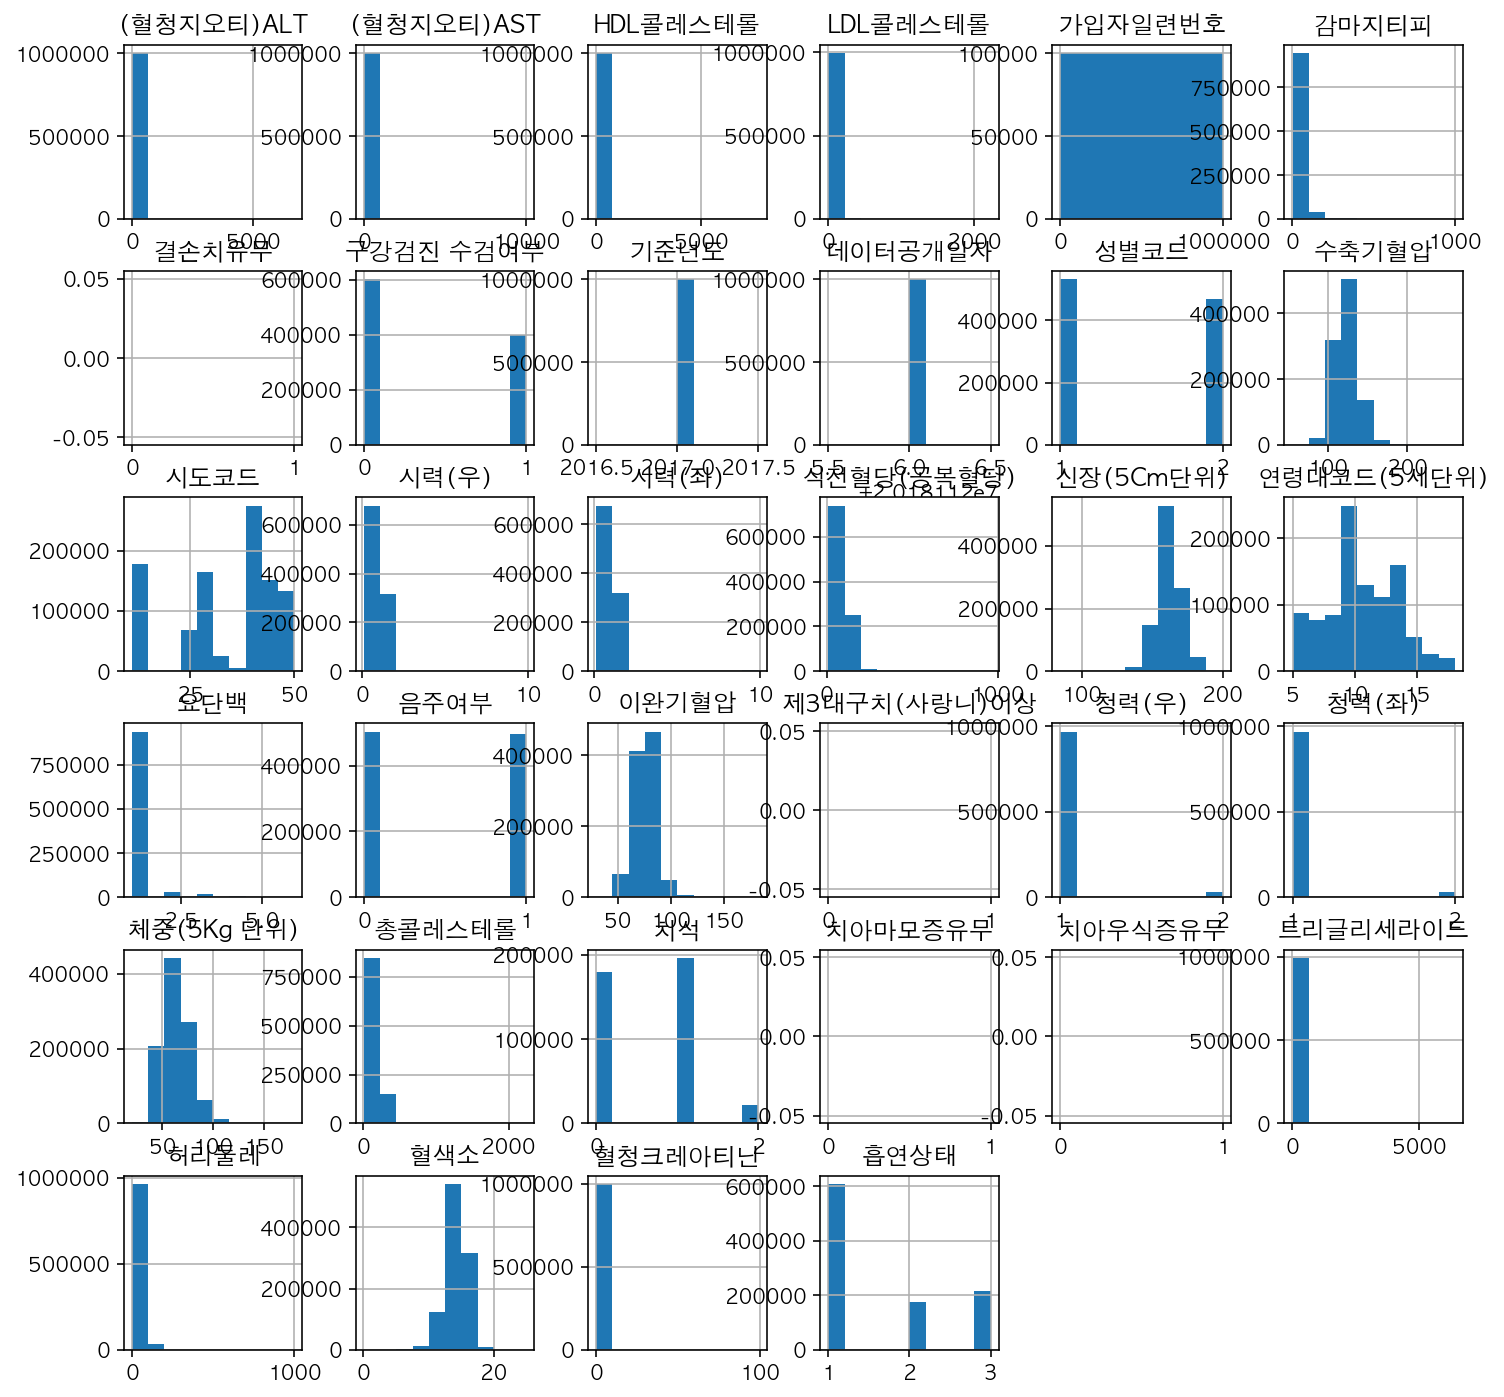

In [28]:
# 전체 데이터에 대한 히스토그램을 출력합니다.
df.hist(figsize=(12, 12))

### 슬라이싱을 사용해 히스토그램 그리기
* 슬라이싱 기능을 사용해서 데이터를 나누어 그립니다.
* 슬라이싱 사용시 iloc를 활용하면 인덱스의 순서대로 슬라이싱이 가능합니다.
* iloc[행, 열] 순으로 인덱스를 써주면 해당 인덱스만 불러오며, 전체 데이터를 가져오고자 할 때는 [:, :]을 사용합니다.
* 슬라이싱을 해주는 대괄호 안의 콜론 앞뒤에 숫자를 써주게 되면 해당 시작인덱스:끝나는인덱스(+1)를 지정할 수 있습니다.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1239391d0>,
      dtype=object)

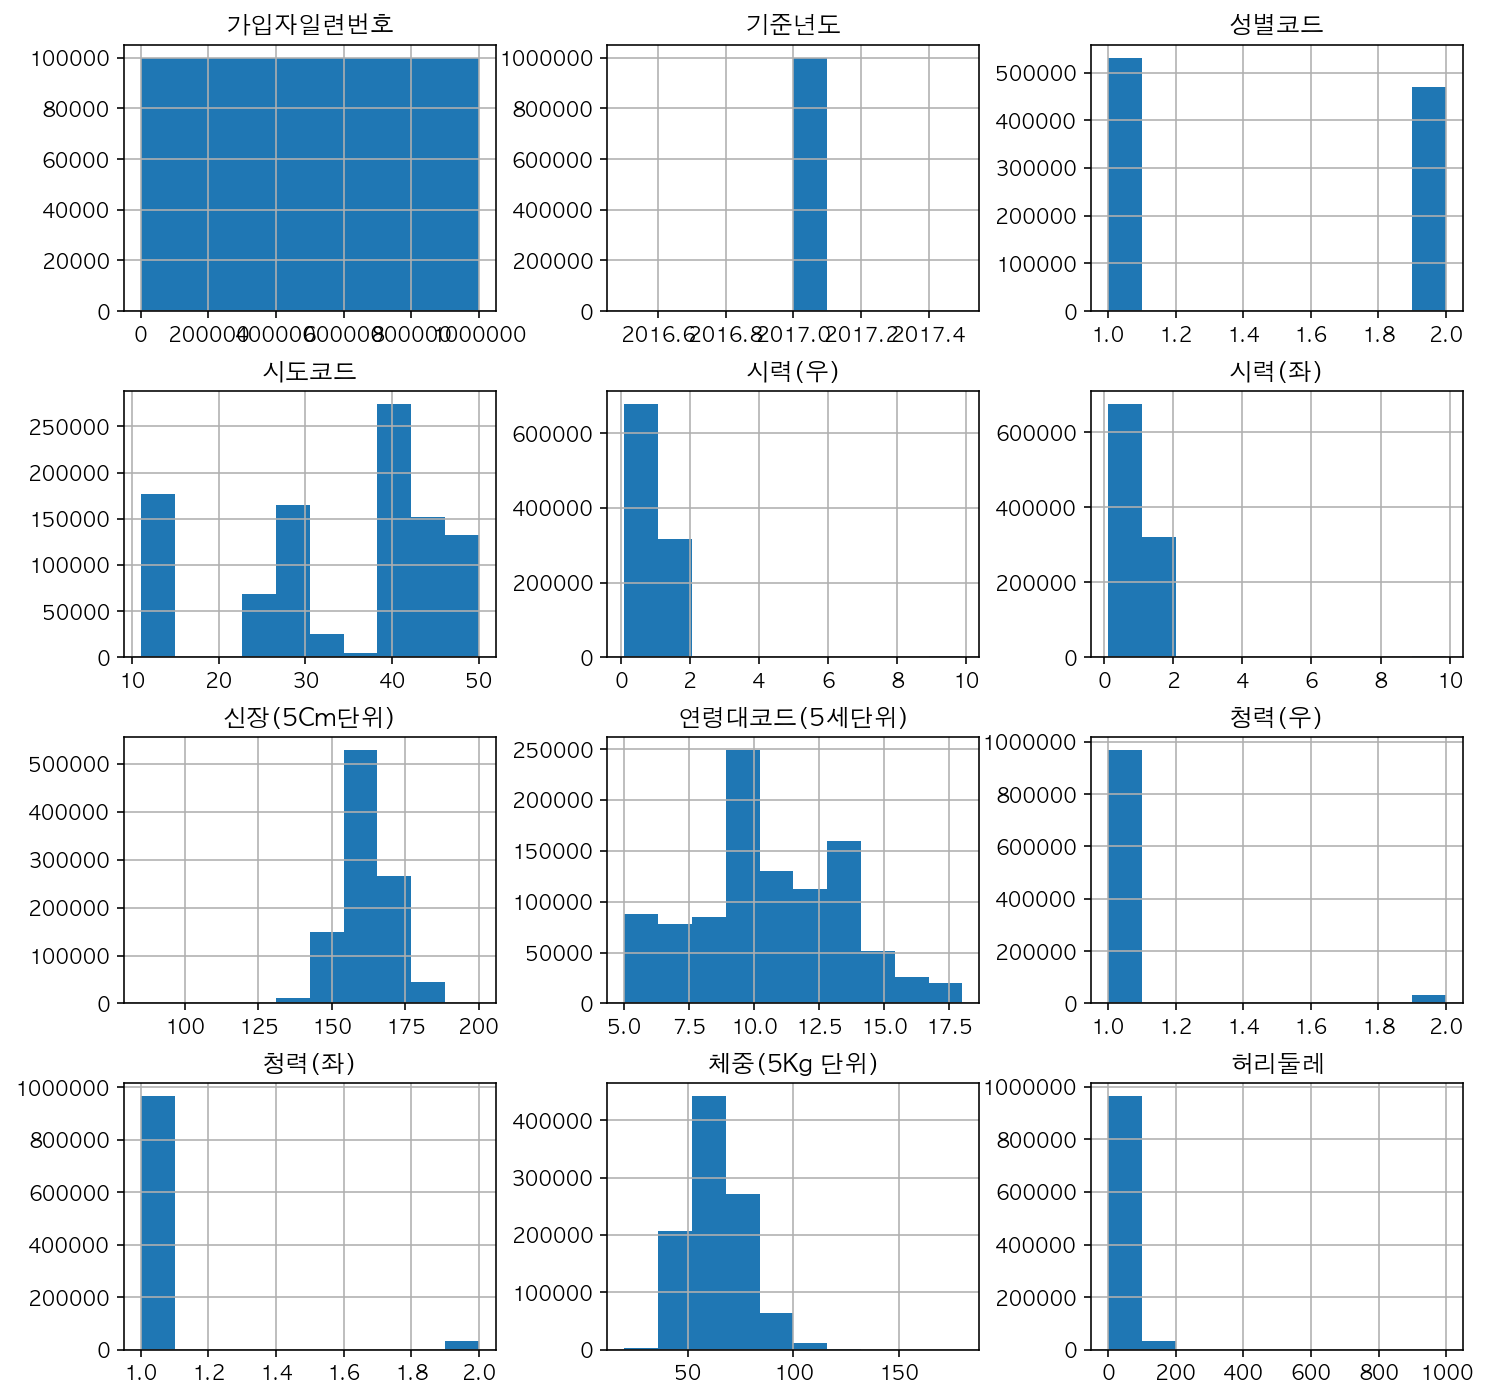

In [29]:
df.iloc[:, :12].hist(figsize=(12, 12))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1243c8550>,
      dtype=object)

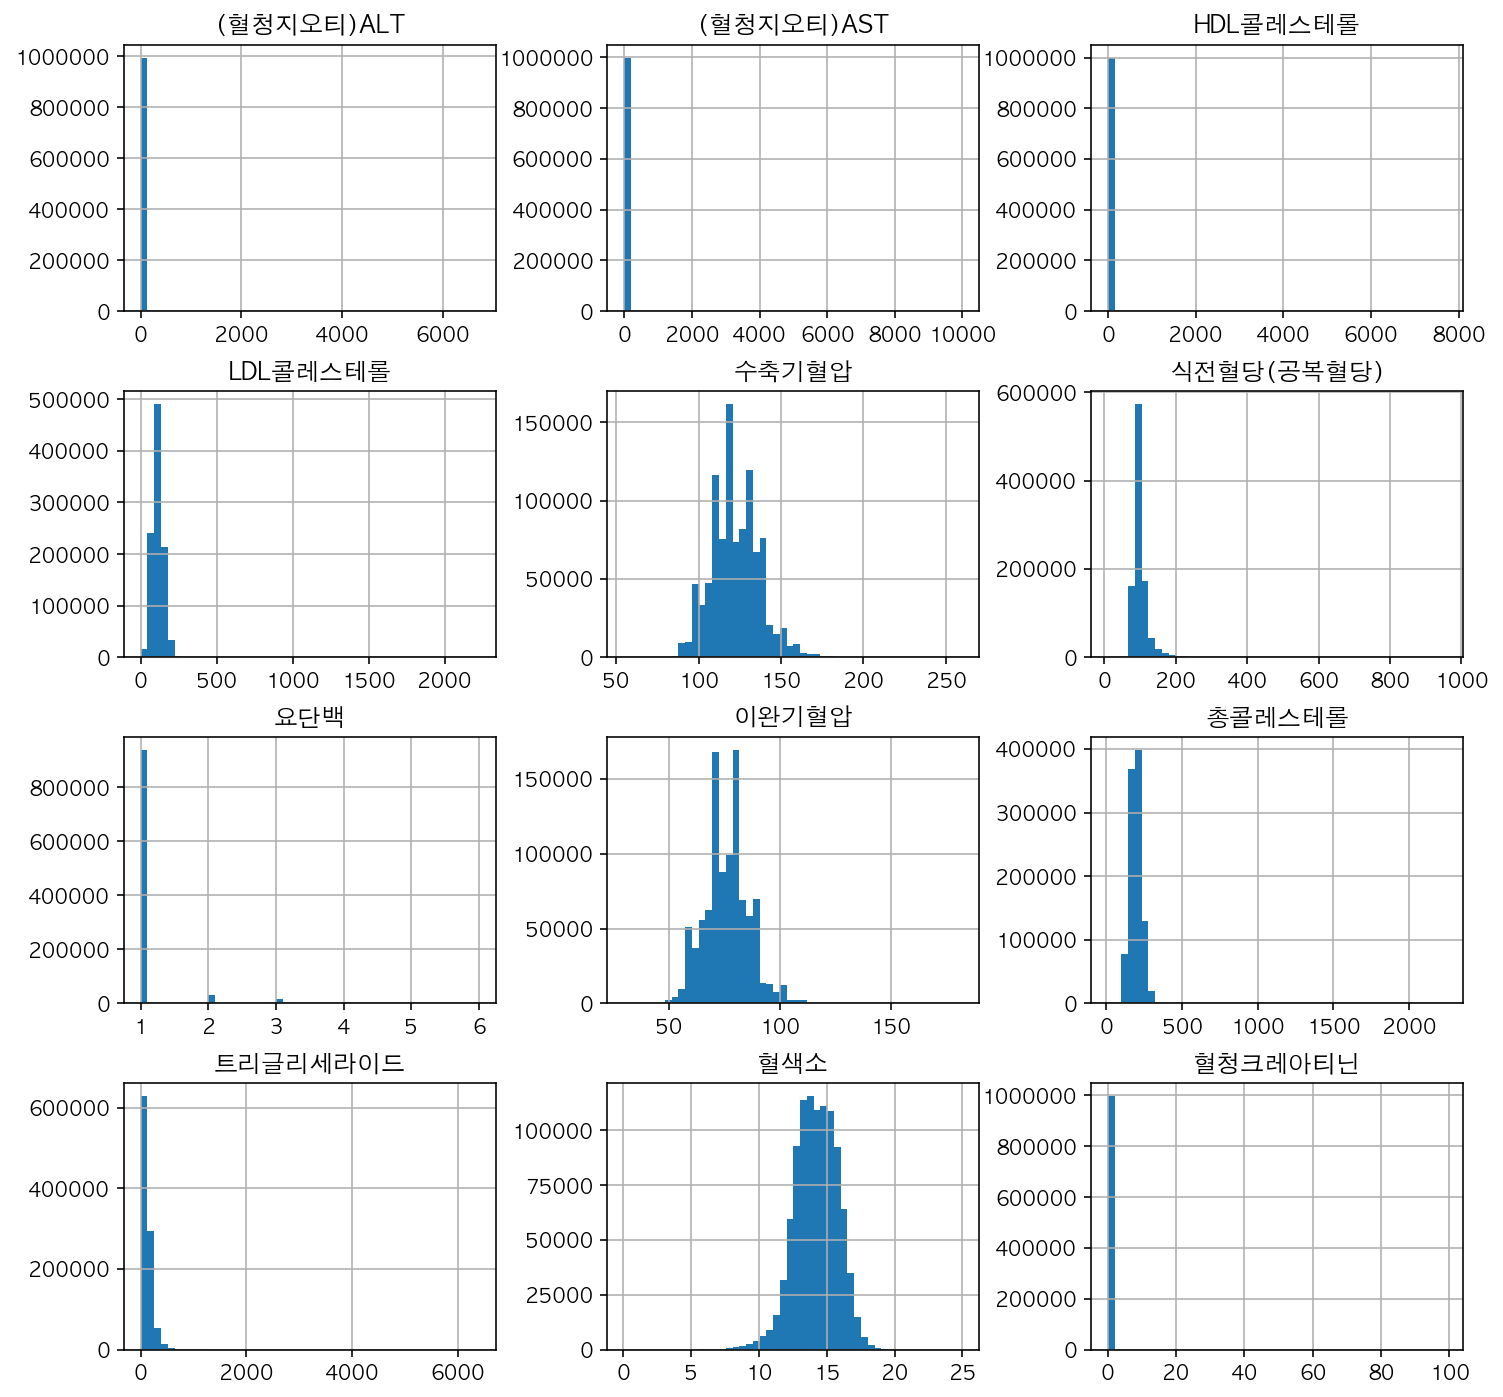

In [30]:
df.iloc[:, 12:24].hist(bins=50, figsize=(12, 12))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x125914d30>,
      dtype=object)

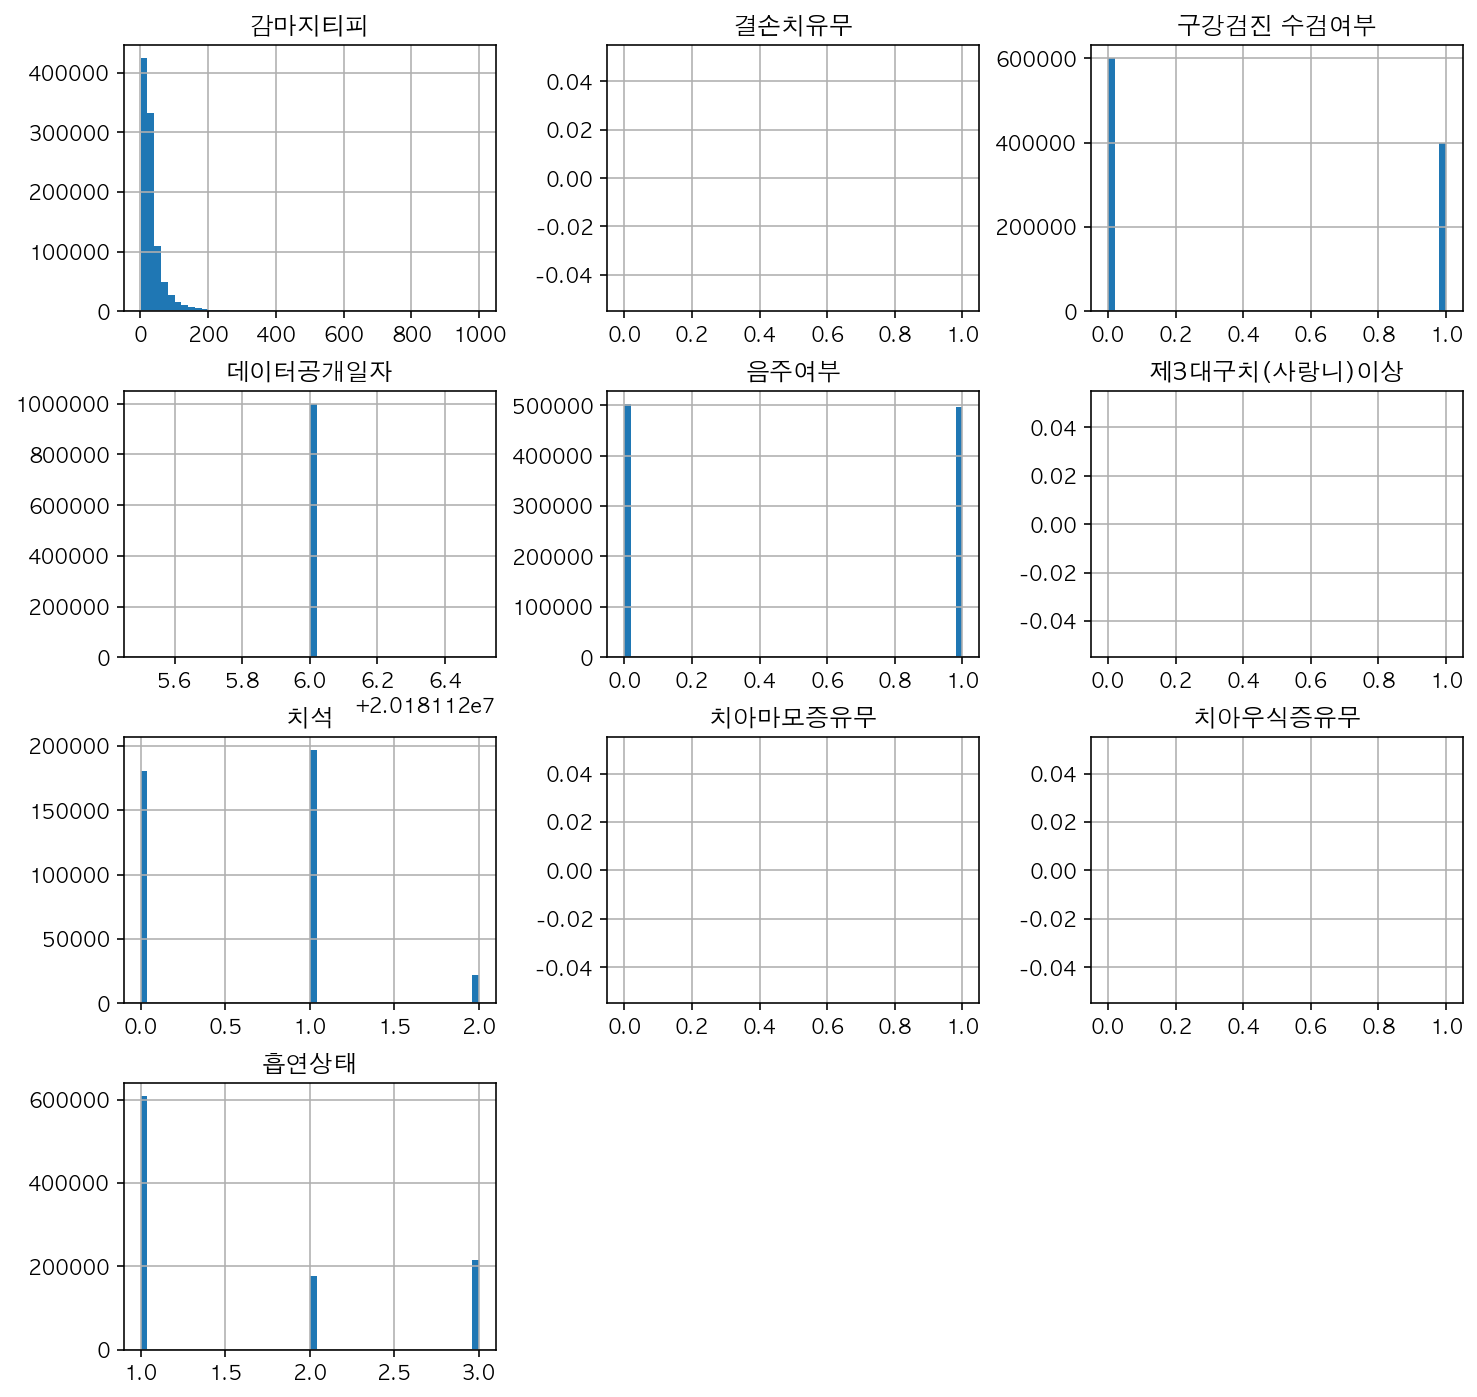

In [31]:
df.iloc[:, 24:].hist(bins=50, figsize=(12, 12))


## 샘플데이터 추출하기
* seaborn 의 그래프는 내부에서 수학적 연산이 되기 때문에 데이터가 많으면 속도가 오래 걸립니다.
* 따라서 전체 데이터를 사용하면 너무 느리기 때문에 일부만 샘플링해서 사용합니다.

In [32]:
# df.sample을 통해 샘플데이터를 추출합니다.
df_sample = df.sample(3000, random_state=1)
df_sample.shape

(3000, 34)

## 범주형(카테고리) 데이터 시각화
* countplot은 범주형 데이터의 수를 더한 값을 그래프로 표현합니다.
* value_counts 로 구한 값을 시각화 한다고 보면 됩니다.

### countplot - 연령대코드

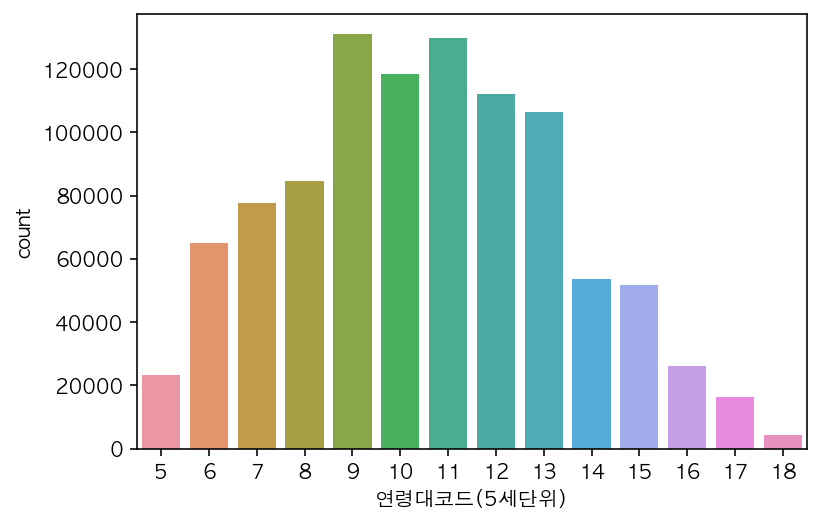

In [33]:
sns.countplot(data=df, x="연령대코드(5세단위)")

### hue 옵션 사용하기

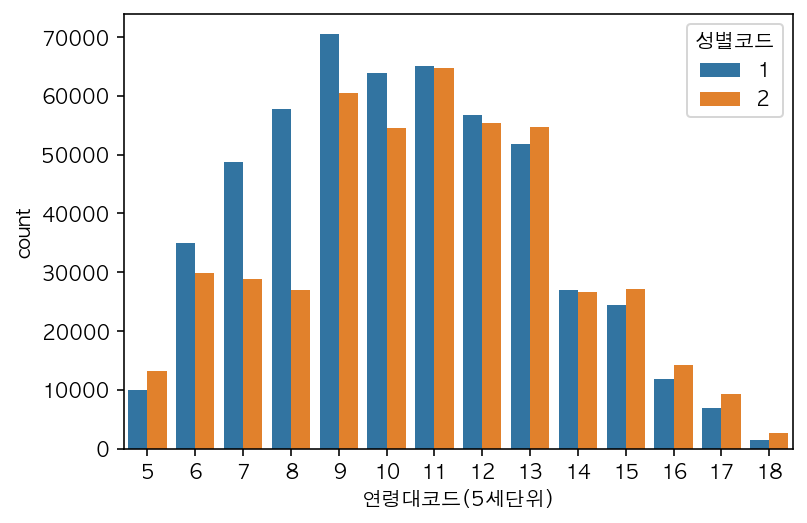

In [34]:
sns.countplot(data=df, x="연령대코드(5세단위)", hue="성별코드")

* 흡연상태에 따른 연령대를 봅니다.
```
1 : 흡연 안 함
2 : 흡연했지만 그만 둠
3 : 흡연 중
```

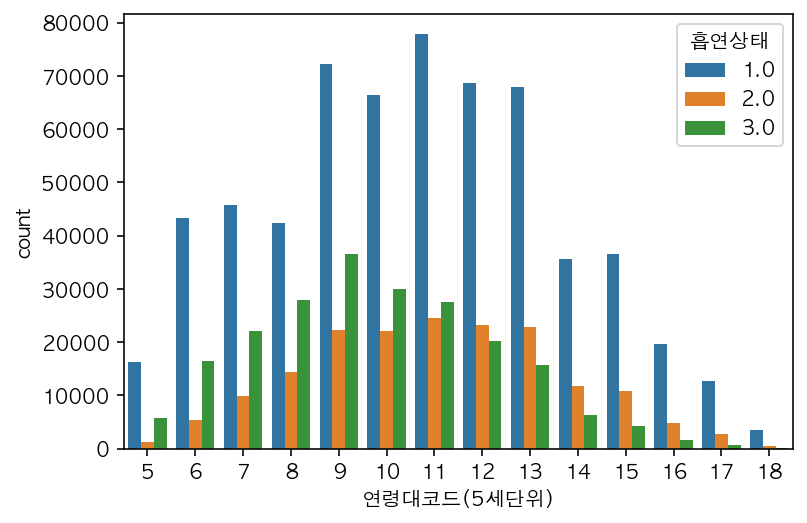

In [35]:
sns.countplot(data=df, x="연령대코드(5세단위)", hue="흡연상태")

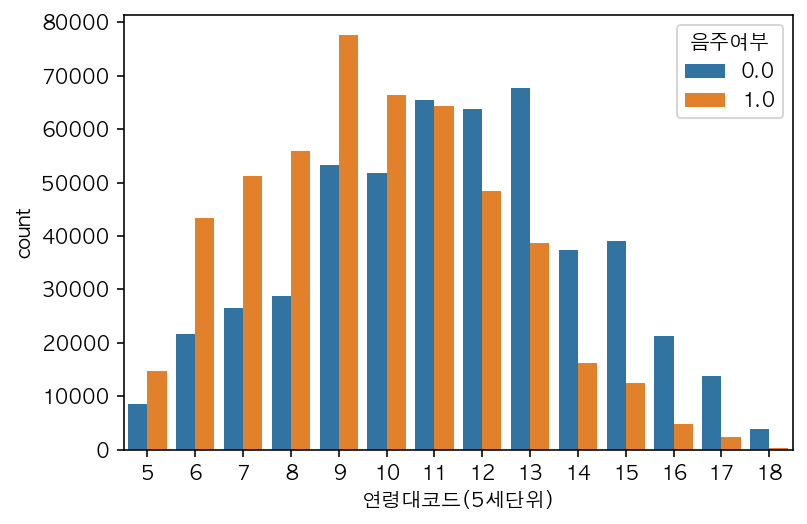

In [36]:
sns.countplot(data=df, x="연령대코드(5세단위)", hue="음주여부")

### countplot - 키와 몸무게
* 키와 몸무게는 연속형 데이터라고 볼 수 있습니다. 
* 하지만 이 데이터는 키는 5cm, 체중은 5kg 단위로 되어 있습니다. 
* 이렇게 특정 범위로 묶게 되면 연속형 데이터라기 보다는 범주형 데이터라고 볼 수 있습니다.

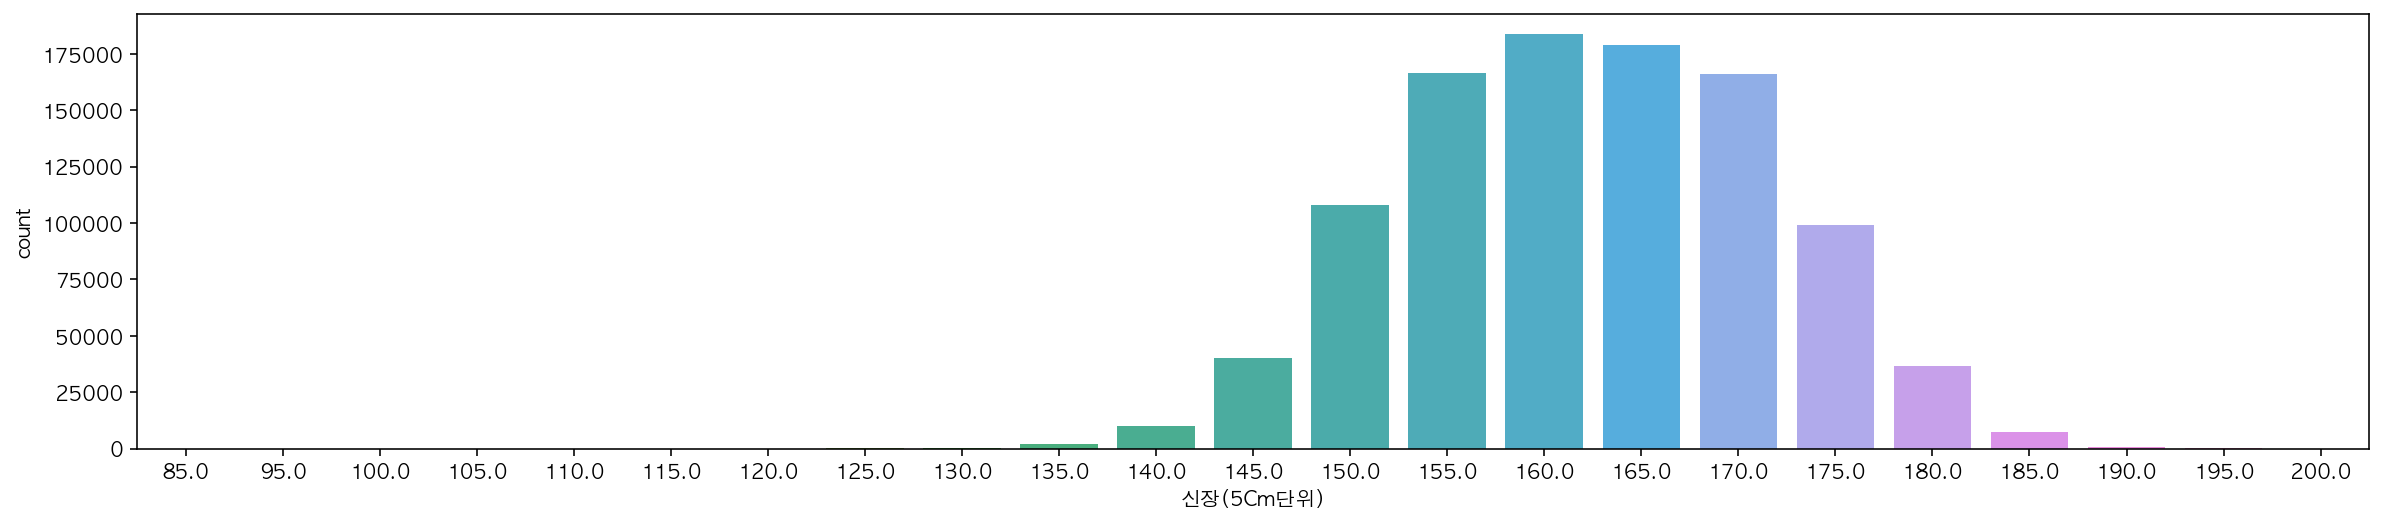

In [37]:
# 키를 봅니다.
plt.figure(figsize=(20, 4))
sns.countplot(data=df, x="신장(5Cm단위)")

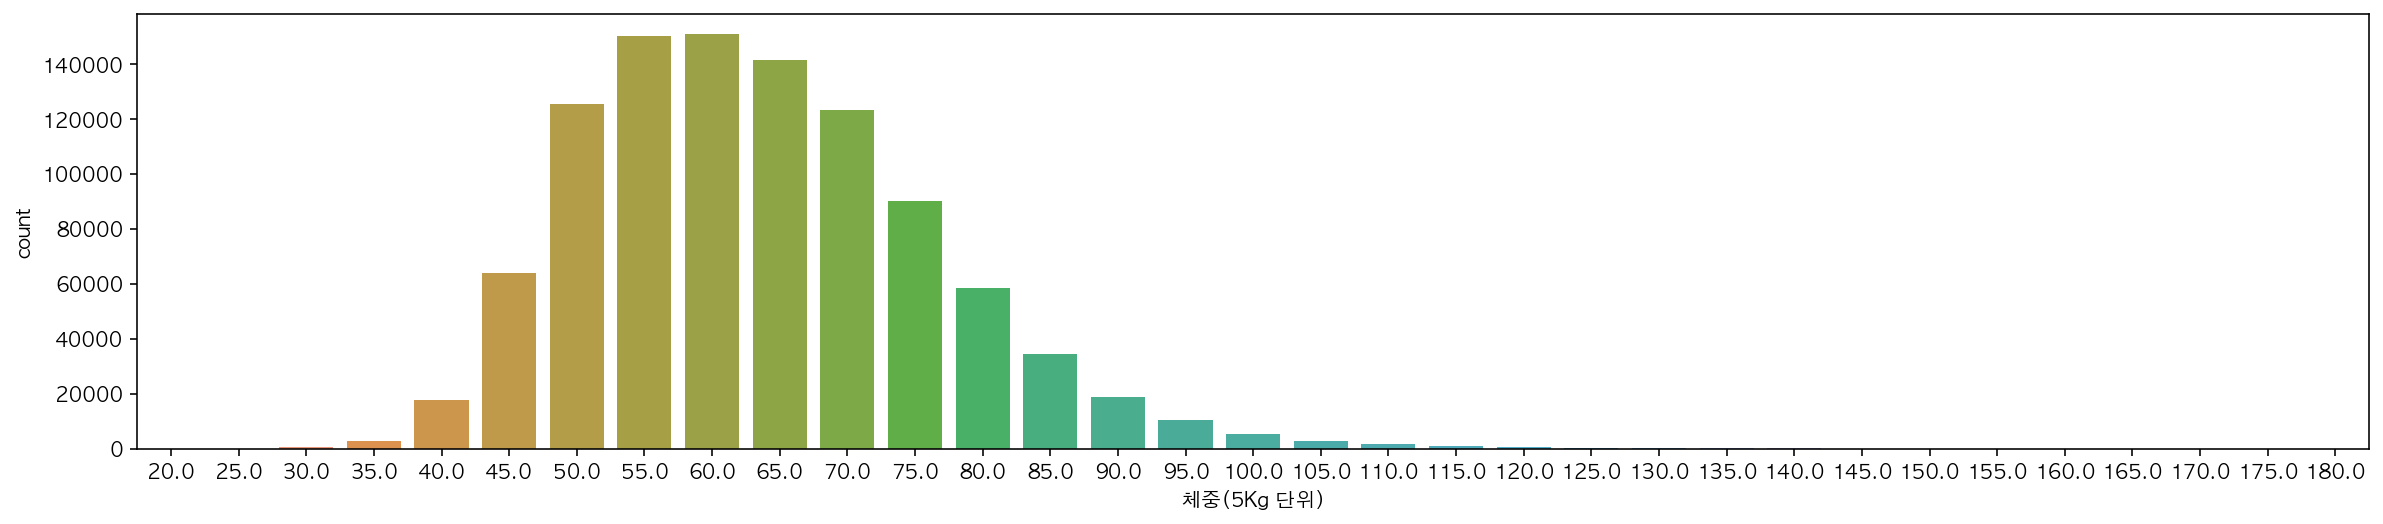

In [38]:
# 체중을 봅니다.
plt.figure(figsize=(20, 4))
sns.countplot(data=df, x="체중(5Kg 단위)")

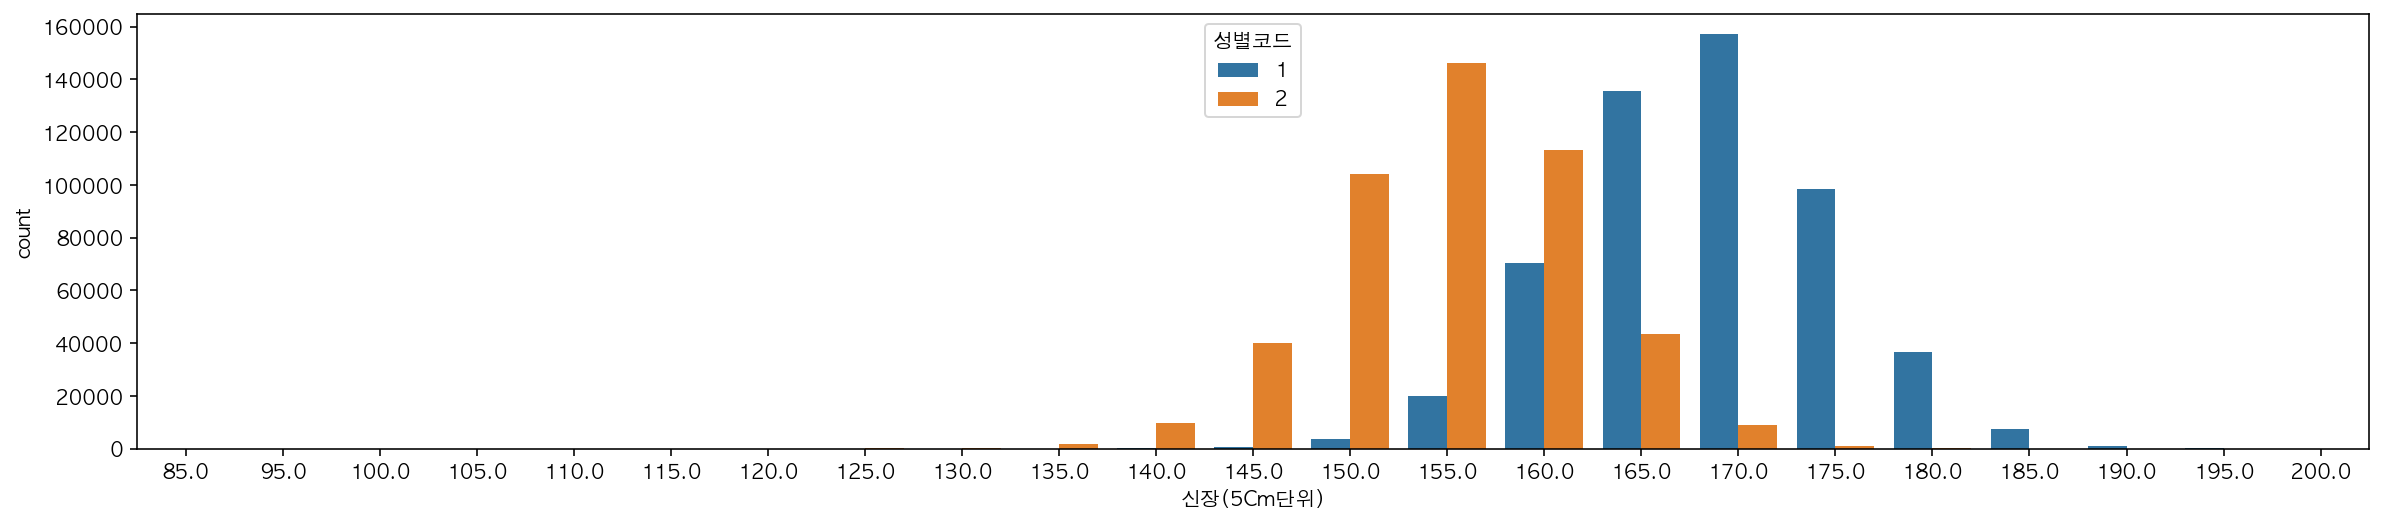

In [39]:
# 성별에 따른 키의 차이를 봅니다.
plt.figure(figsize=(20, 4))
sns.countplot(data=df, x="신장(5Cm단위)", hue="성별코드")

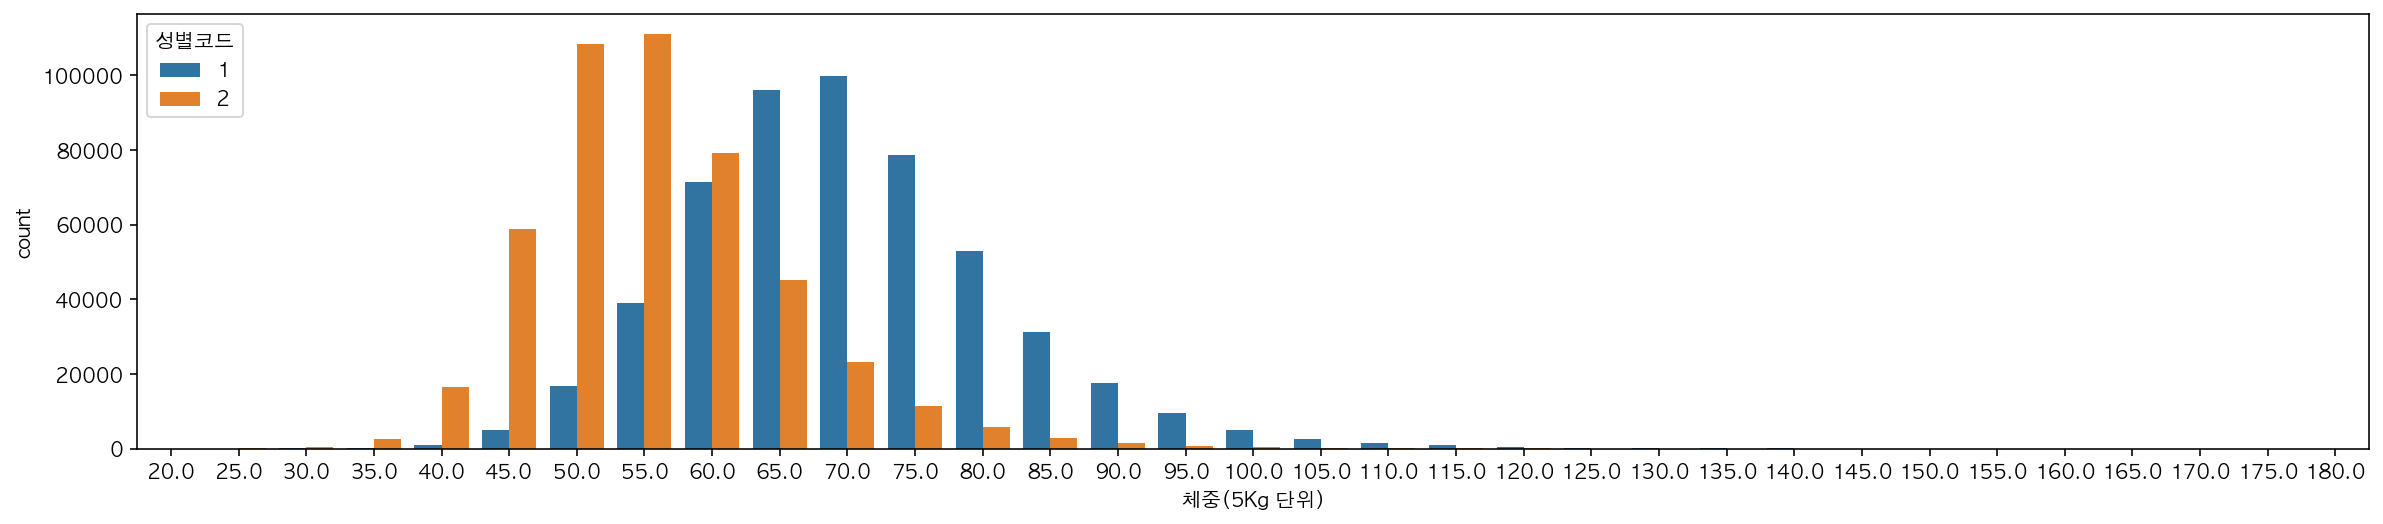

In [40]:
# 성별에 따른 체중의 차이를 봅니다.
plt.figure(figsize=(20, 4))
sns.countplot(data=df, x="체중(5Kg 단위)", hue="성별코드")

### barplot - 수치형 vs 범주형 데이터 시각화

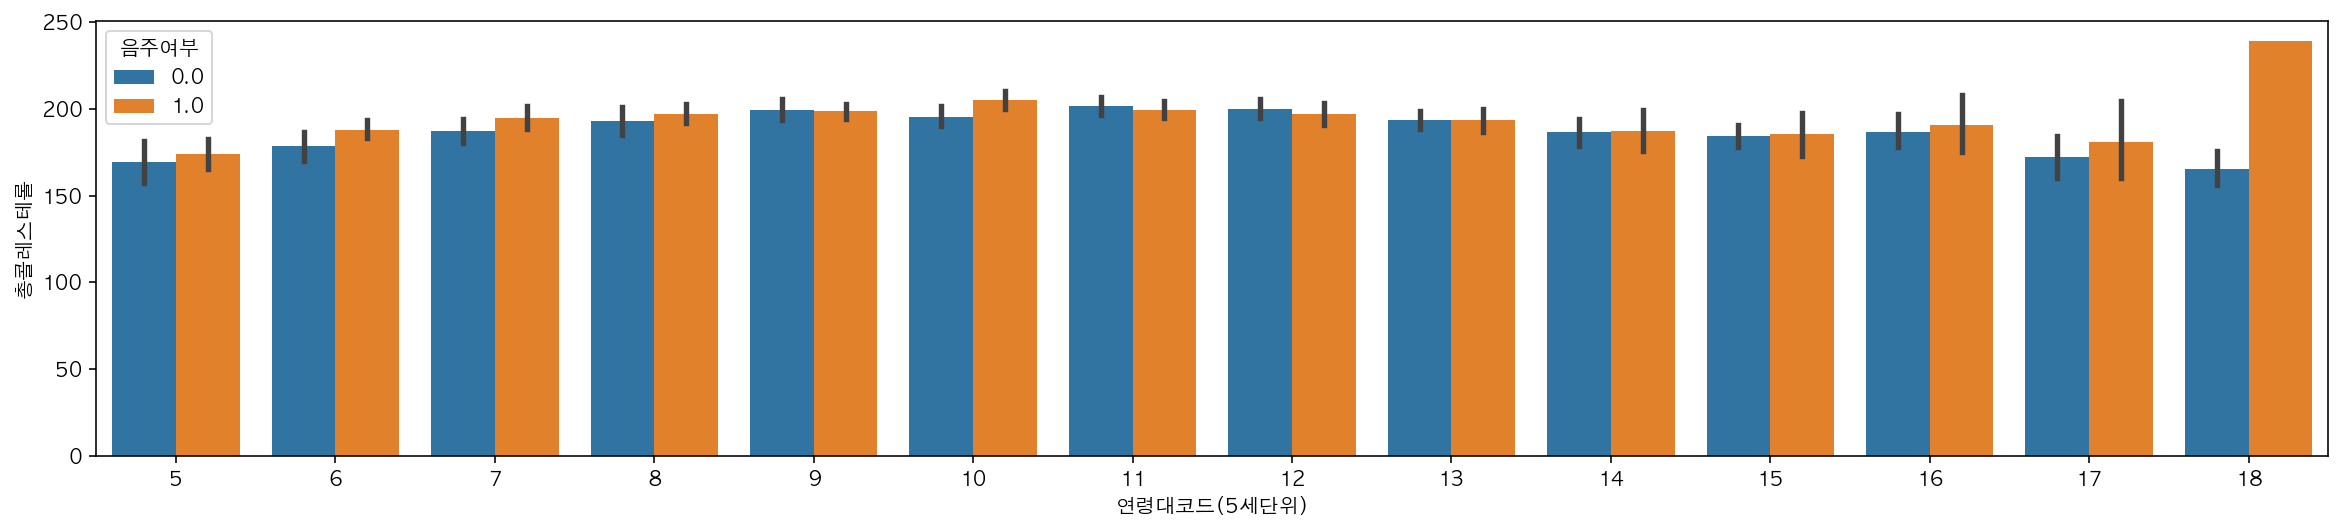

In [41]:
# 연령대코드와 총 콜레스테롤을 봅니다.
# hue 로 색상을 다르게 표현할 수 있습니다. 음주여부를 함께 봅니다.
plt.figure(figsize=(20, 4))
sns.barplot(data=df_sample, x="연령대코드(5세단위)", 
            y="총콜레스테롤", hue="음주여부")

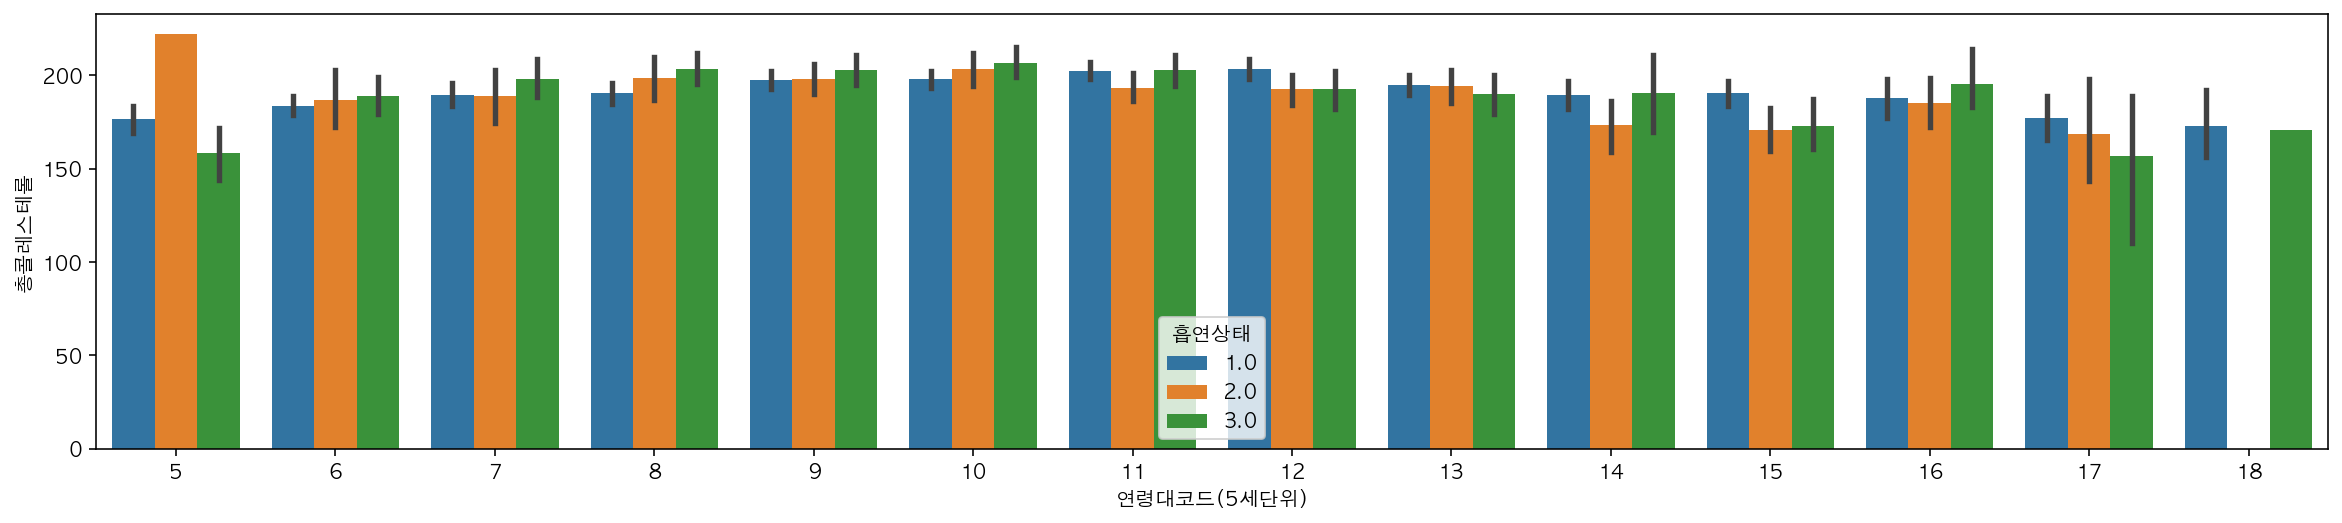

In [42]:
# 연령대코드와 총 콜레스테롤을 봅니다.
# hue 로 색상을 다르게 표현할 수 있습니다. 흡연상태를 함께 봅니다.
plt.figure(figsize=(20, 4))
sns.barplot(data=df_sample, x="연령대코드(5세단위)", 
            y="총콜레스테롤", hue="흡연상태")

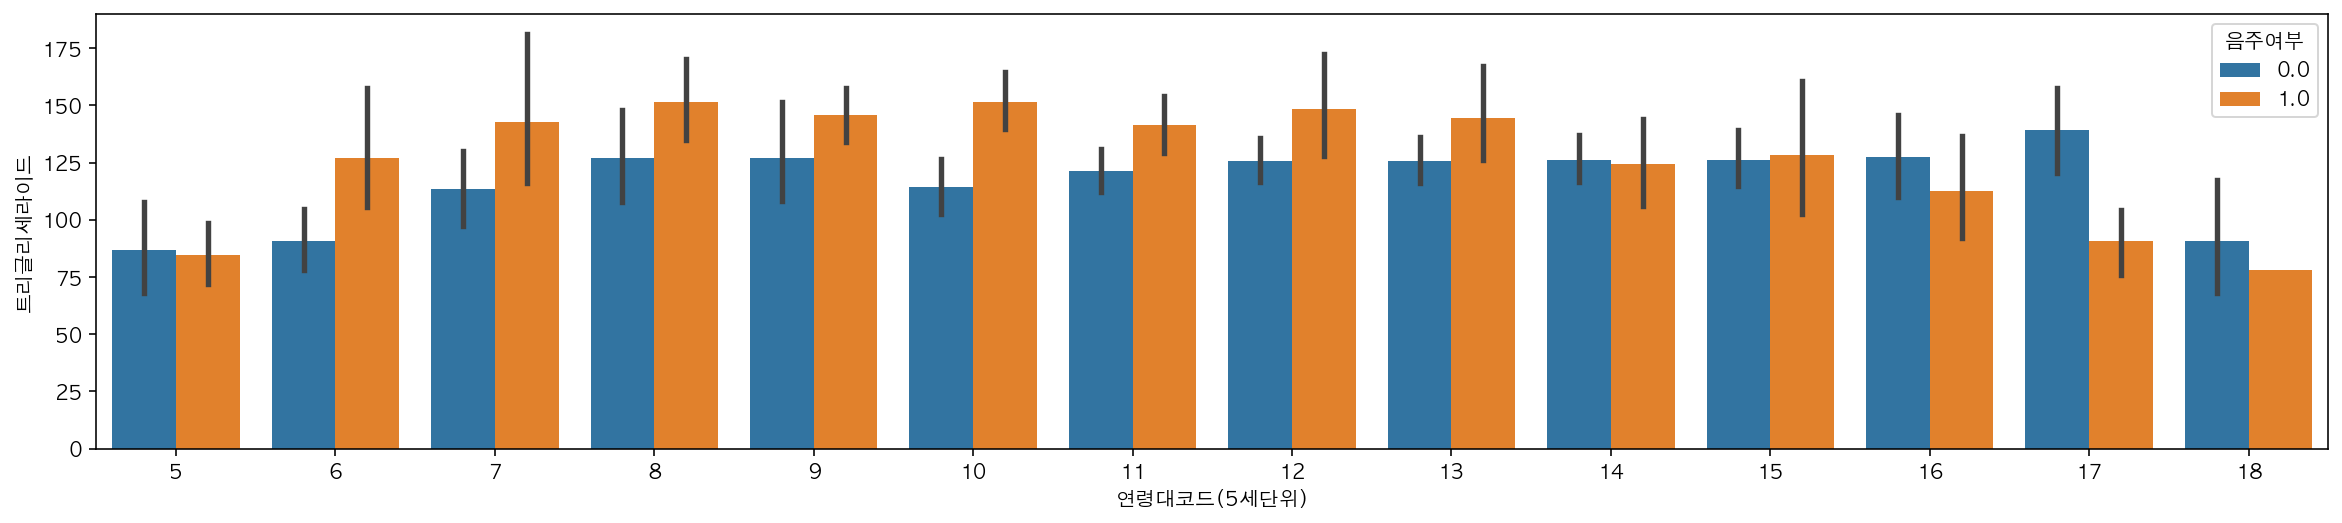

In [43]:
# 트리글리세라이드(중성지방)을 연령대별로 음주여부에 따라 봅니다.
plt.figure(figsize=(20, 4))
sns.barplot(data=df_sample, x="연령대코드(5세단위)", 
            y="트리글리세라이드", hue="음주여부")

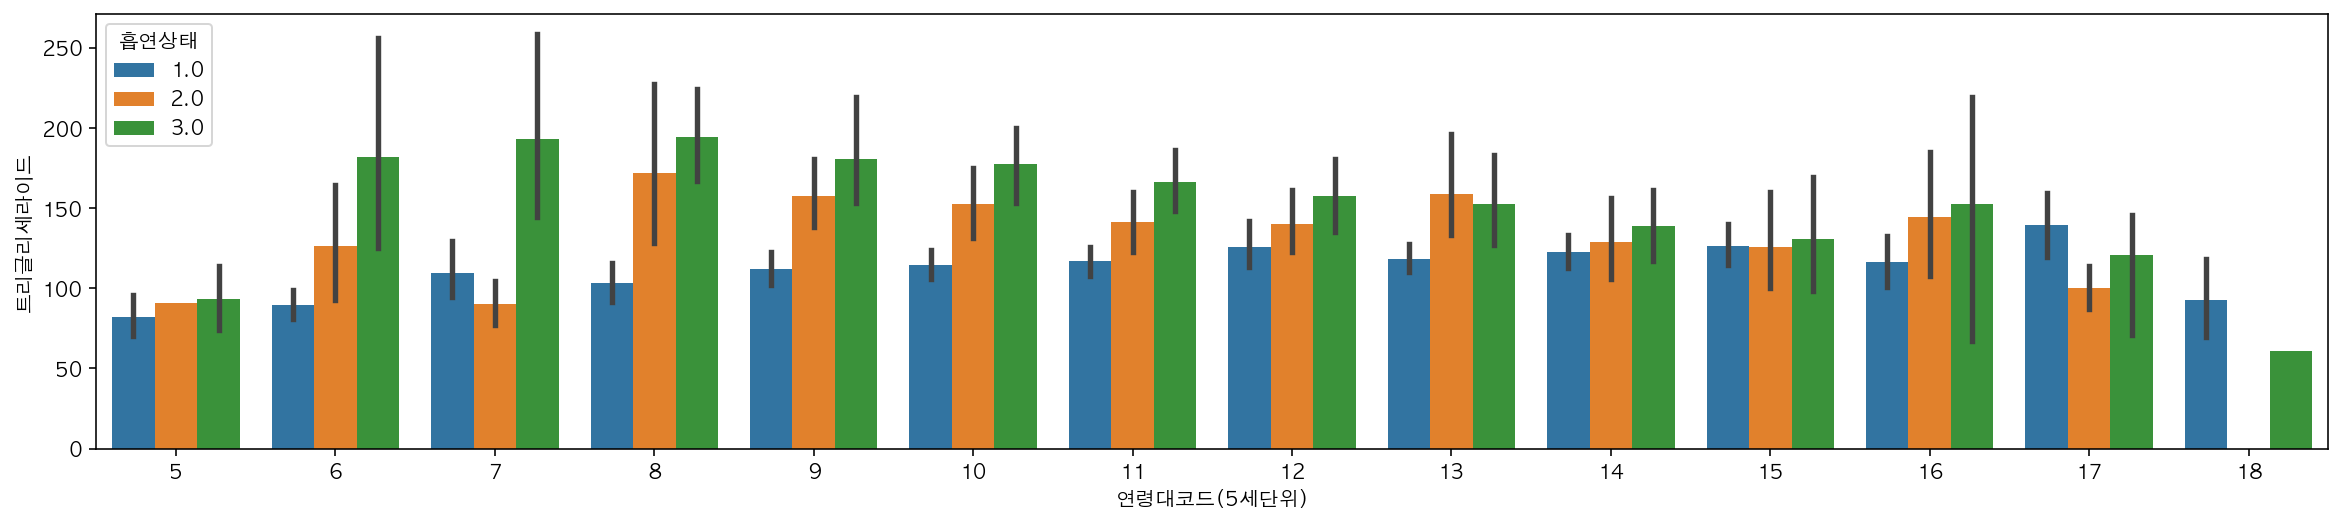

In [44]:
# 트리글리세라이드(중성지방)을 연령대와 흡연상태로 봅니다.
plt.figure(figsize=(20, 4))
sns.barplot(data=df_sample, x="연령대코드(5세단위)", 
            y="트리글리세라이드", hue="흡연상태")

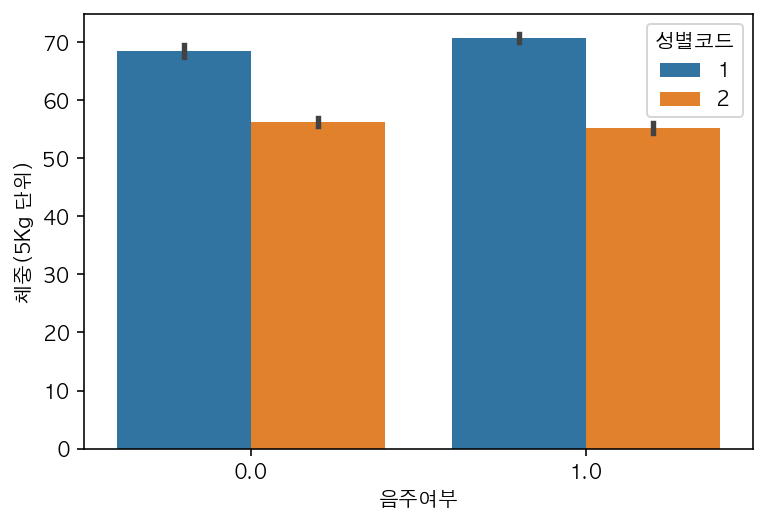

In [45]:
# 음주여부와 성별에 따른 체중을 봅니다.
sns.barplot(data=df_sample, x="음주여부", y="체중(5Kg 단위)", hue="성별코드")

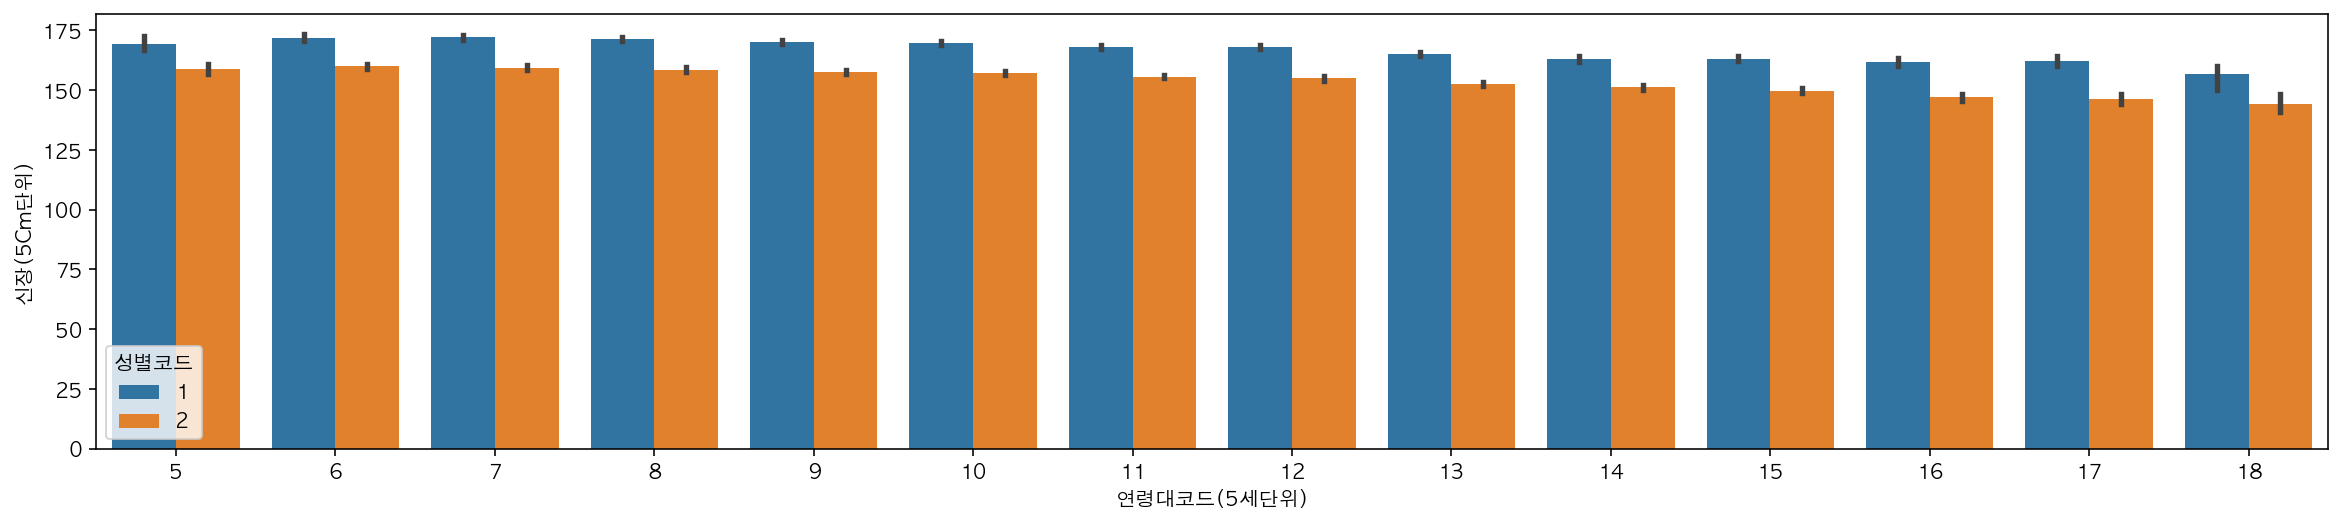

In [46]:
plt.figure(figsize=(20, 4))
sns.barplot(data=df_sample, 
            x="연령대코드(5세단위)", 
            y="신장(5Cm단위)", hue="성별코드")

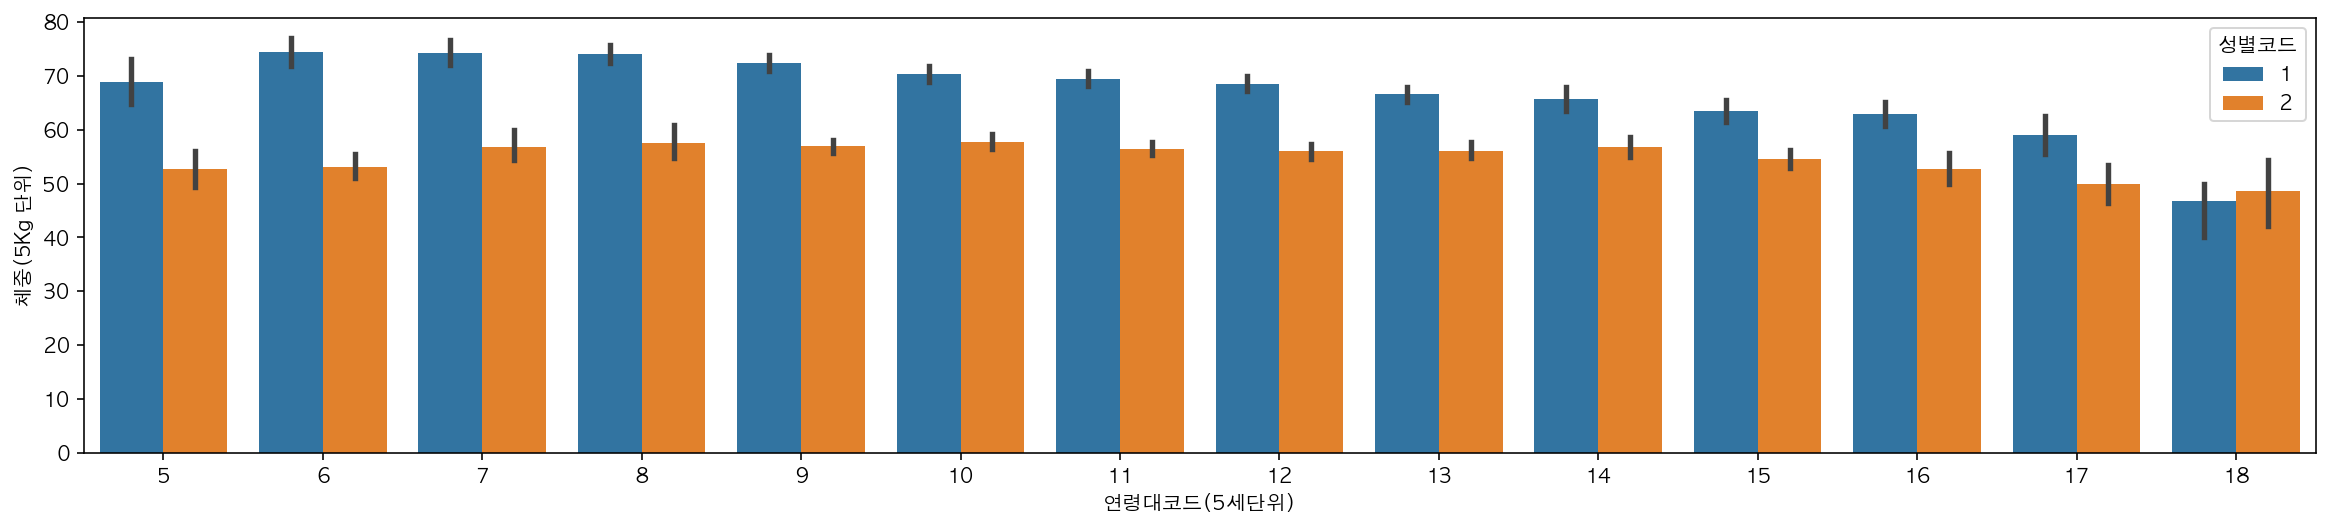

In [47]:
plt.figure(figsize=(20, 4))
sns.barplot(data=df_sample, 
            x="연령대코드(5세단위)", 
            y="체중(5Kg 단위)", hue="성별코드")

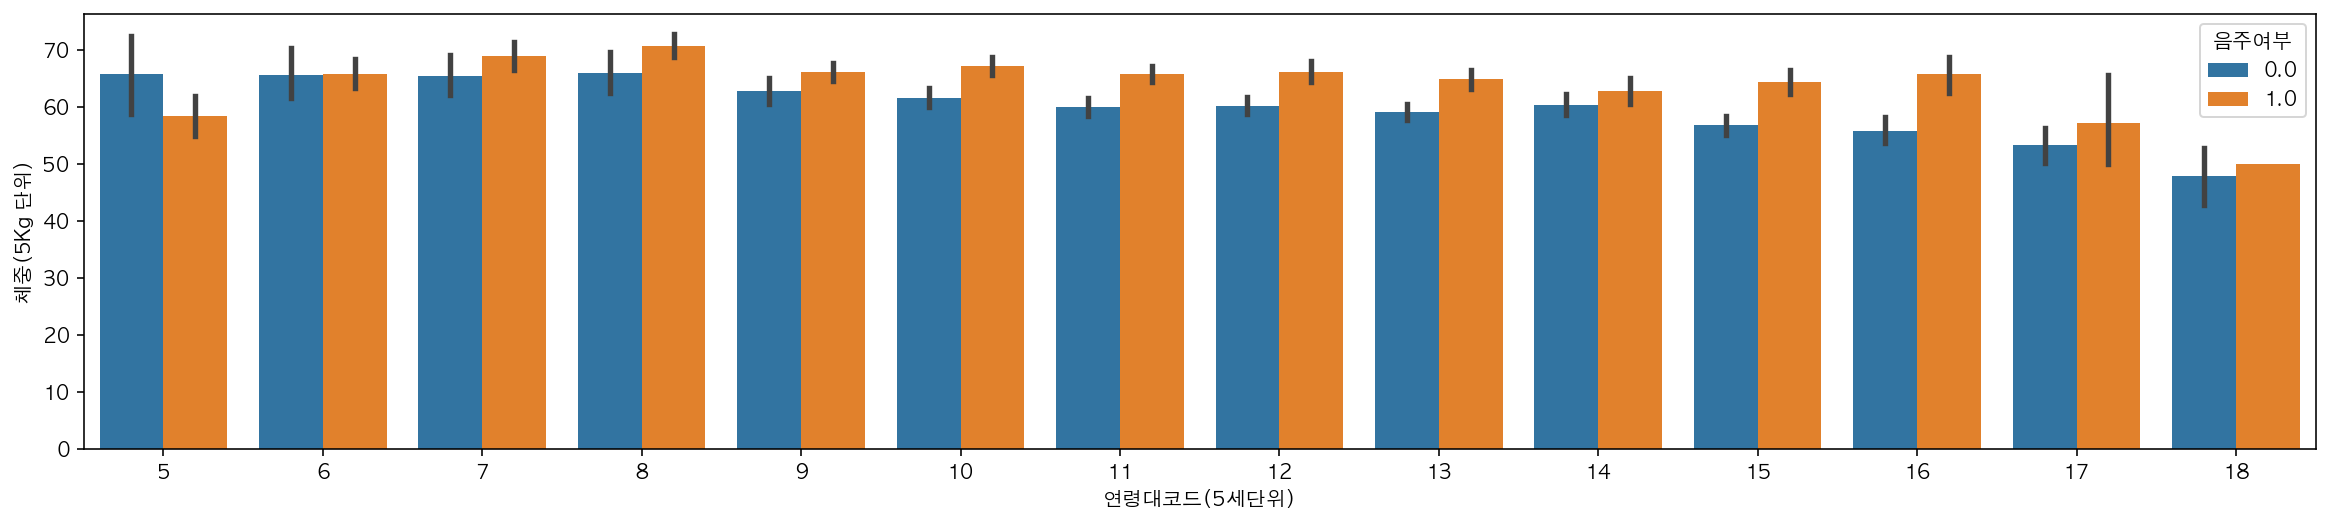

In [48]:
plt.figure(figsize=(20, 4))
sns.barplot(data=df_sample, 
            x="연령대코드(5세단위)", y="체중(5Kg 단위)", hue="음주여부")

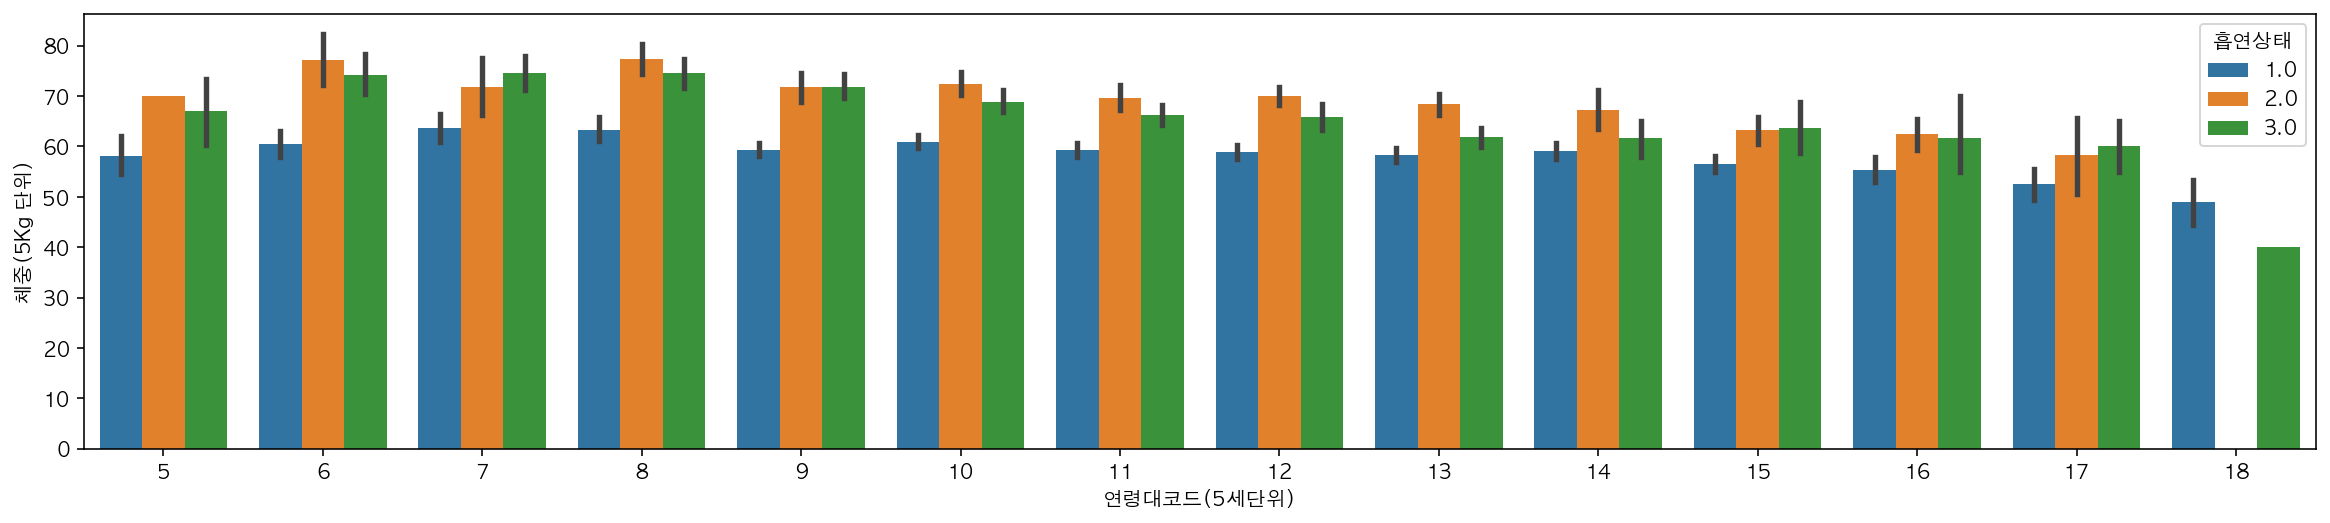

In [49]:
plt.figure(figsize=(20, 4))
sns.barplot(data=df_sample, 
            x="연령대코드(5세단위)", y="체중(5Kg 단위)", hue="흡연상태")

### lineplot and pointplot

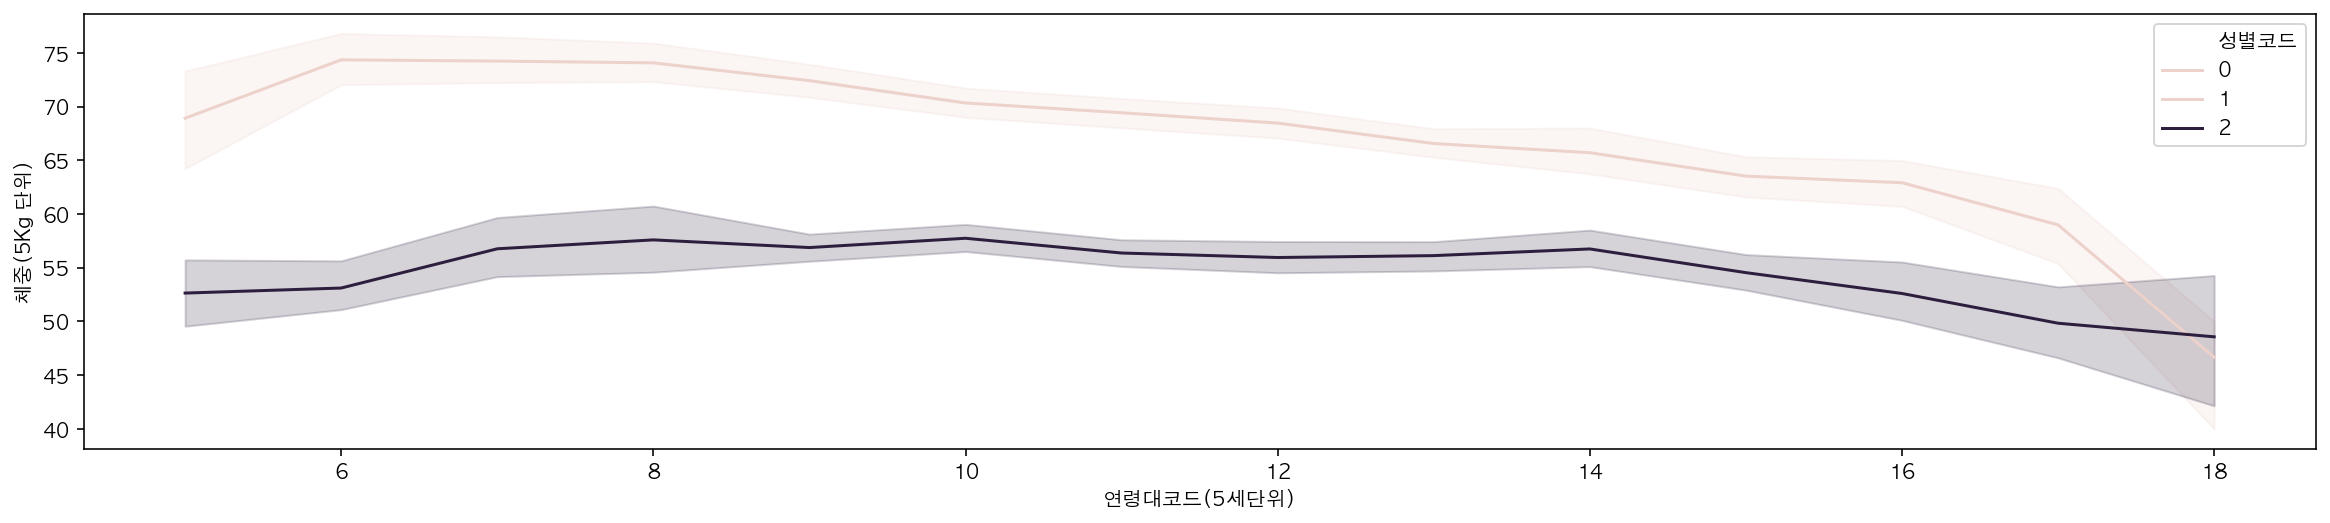

In [50]:
plt.figure(figsize=(20, 4))
sns.lineplot(data=df_sample, 
            x="연령대코드(5세단위)", y="체중(5Kg 단위)", hue="성별코드")

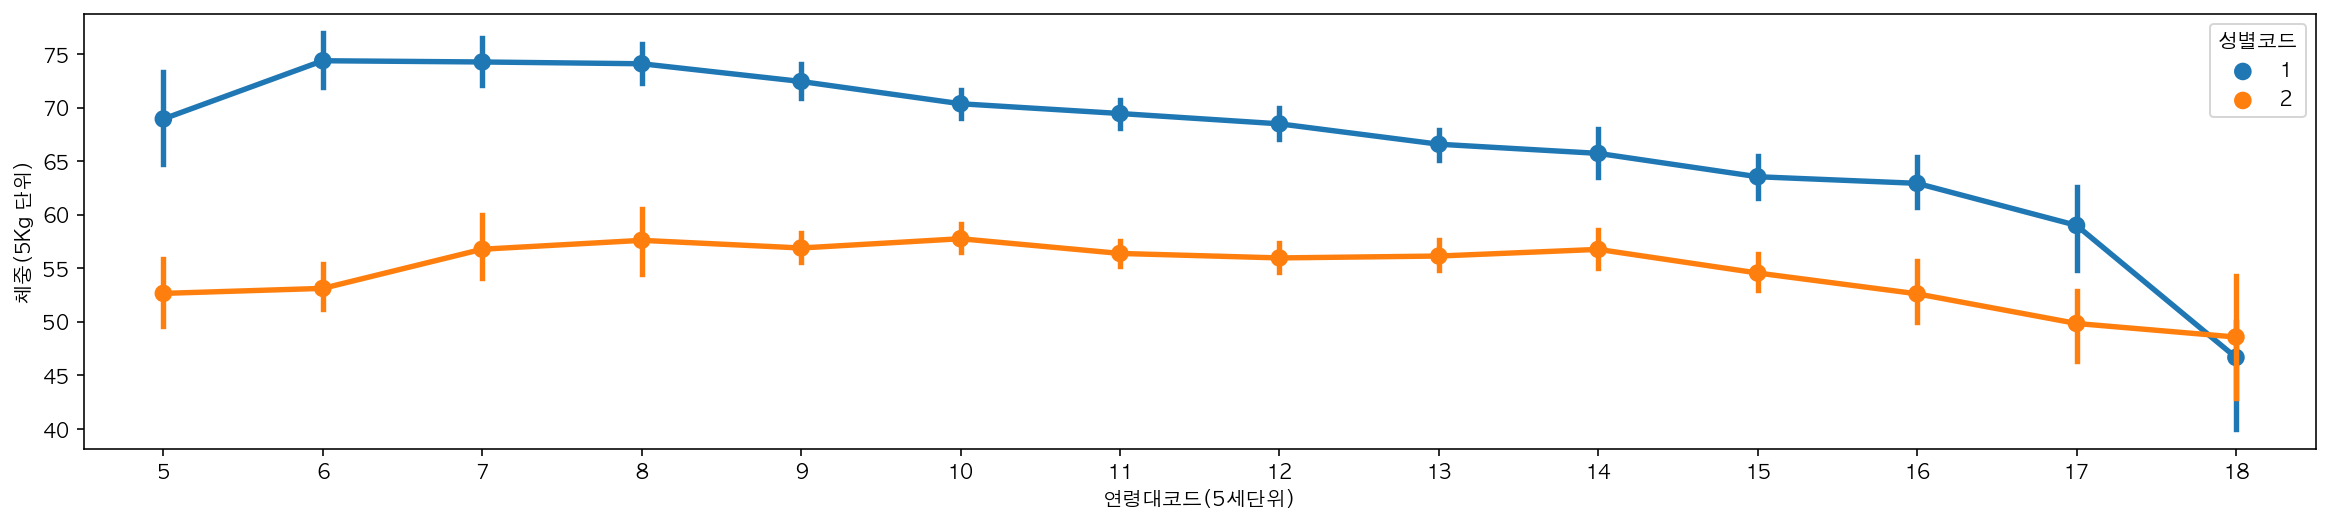

In [51]:
plt.figure(figsize=(20, 4))
sns.pointplot(data=df_sample, 
            x="연령대코드(5세단위)", y="체중(5Kg 단위)", hue="성별코드")

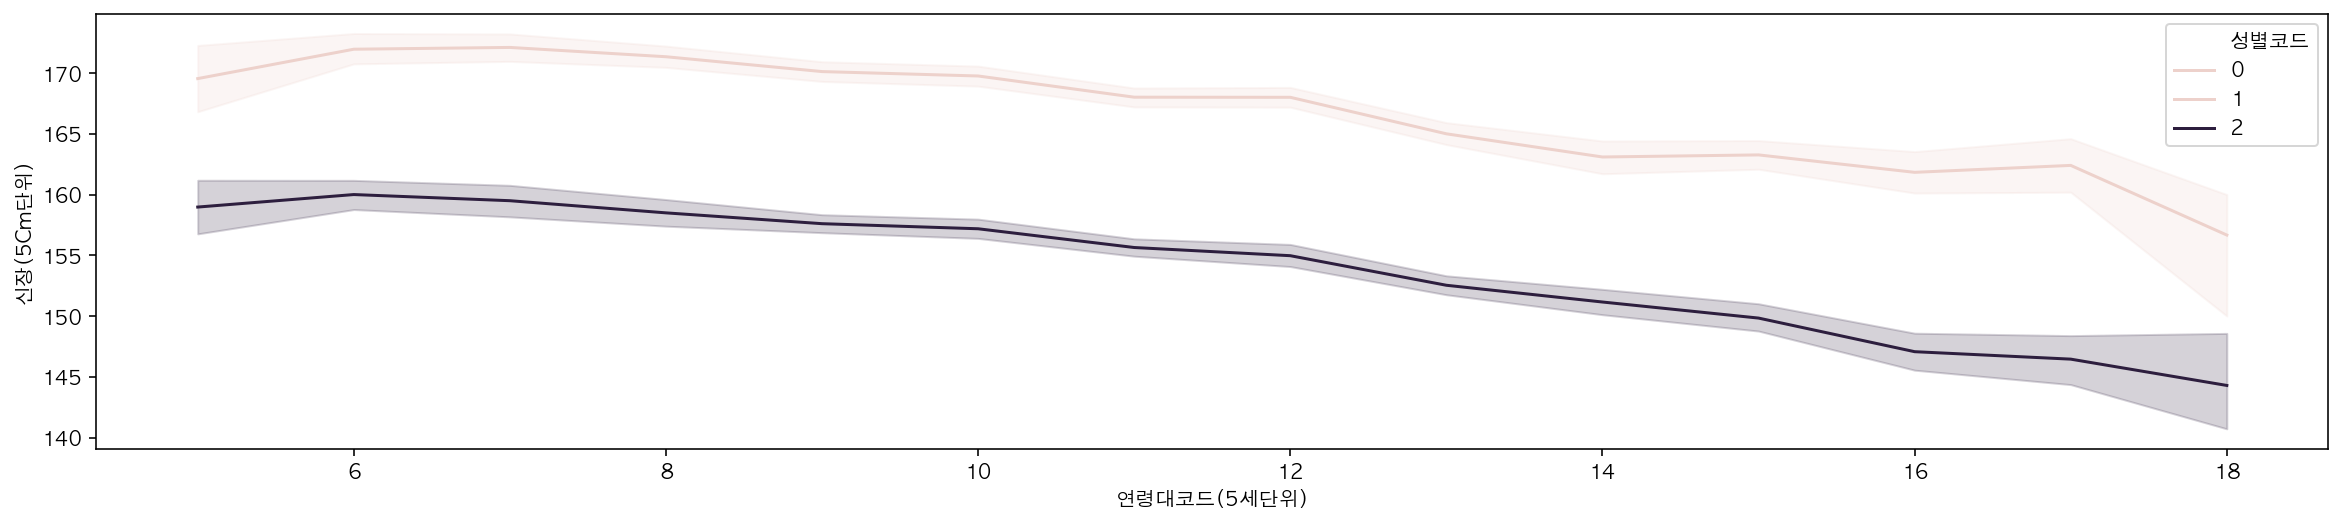

In [52]:
plt.figure(figsize=(20, 4))
sns.lineplot(data=df_sample, 
            x="연령대코드(5세단위)", y="신장(5Cm단위)", hue="성별코드")

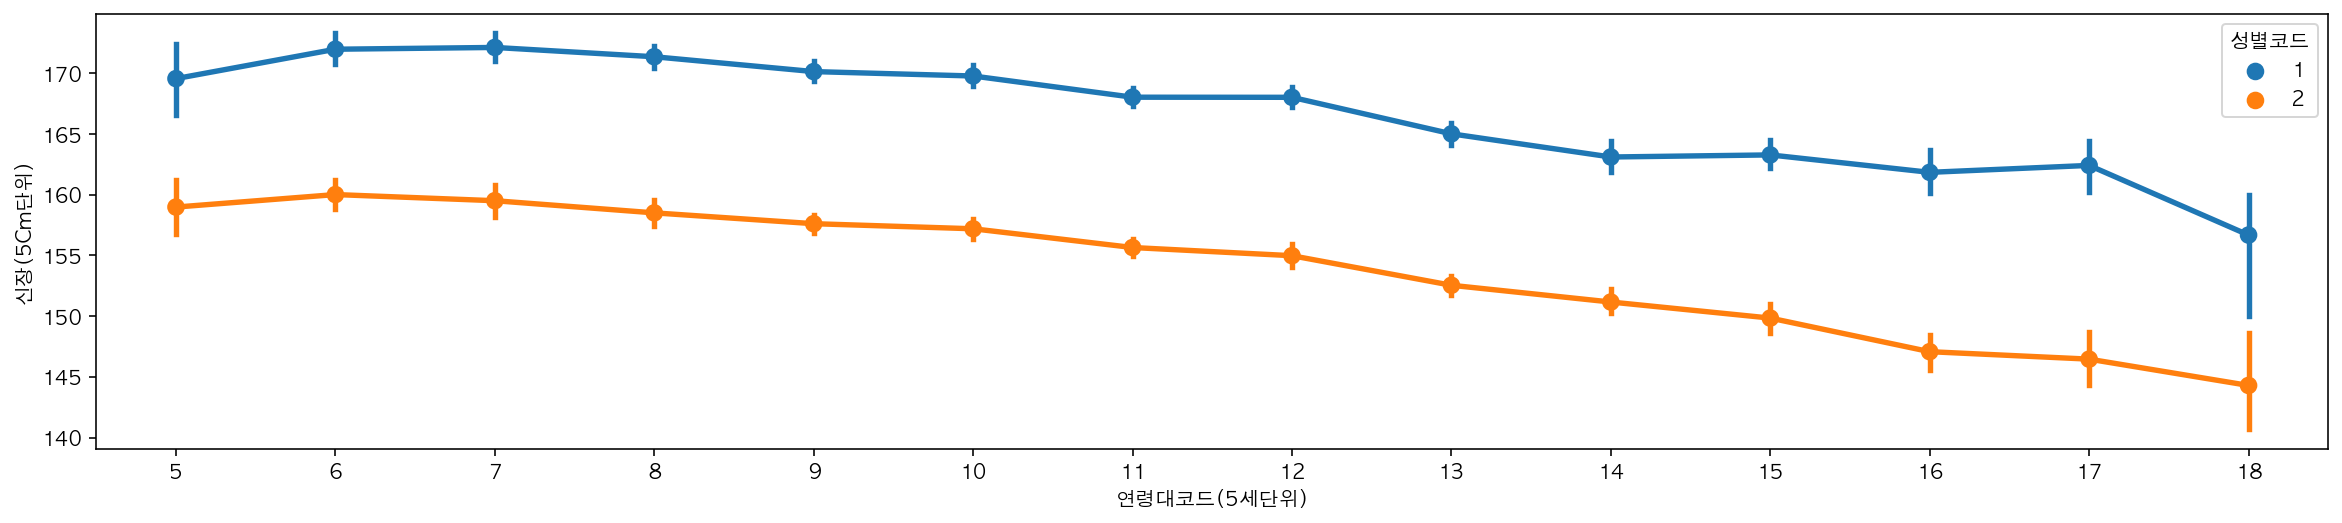

In [53]:
plt.figure(figsize=(20, 4))
sns.pointplot(data=df_sample, 
            x="연령대코드(5세단위)", y="신장(5Cm단위)", hue="성별코드")

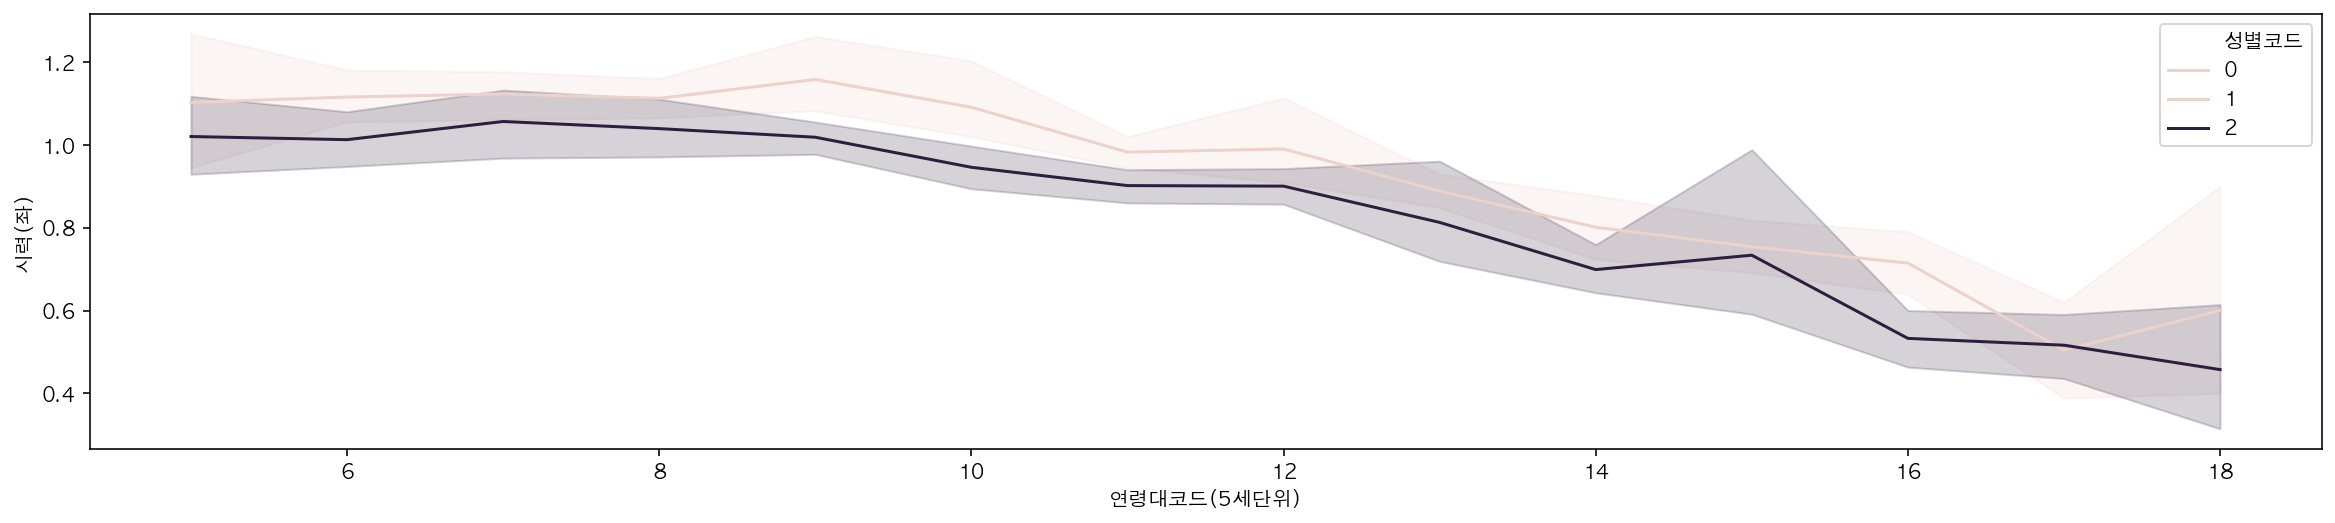

In [54]:
plt.figure(figsize=(20, 4))
sns.lineplot(data=df_sample, 
            x="연령대코드(5세단위)", y="시력(좌)", hue="성별코드")

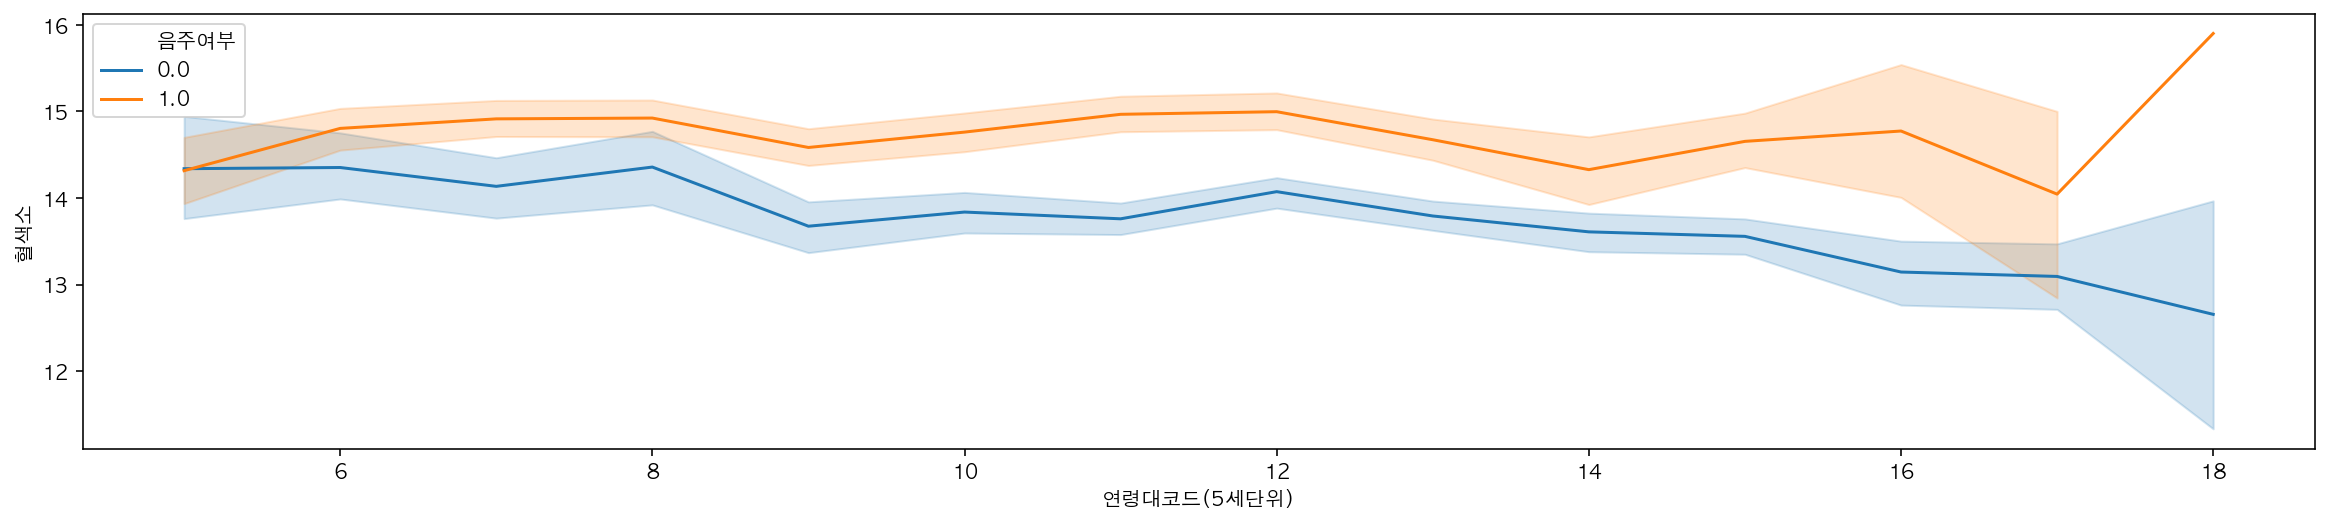

In [55]:
plt.figure(figsize=(20, 4))
sns.lineplot(data=df_sample, 
            x="연령대코드(5세단위)", y="혈색소", hue="음주여부")

In [56]:
df_sample["흡연상태"].value_counts()

1.0    1818
3.0     641
2.0     540
Name: 흡연상태, dtype: int64

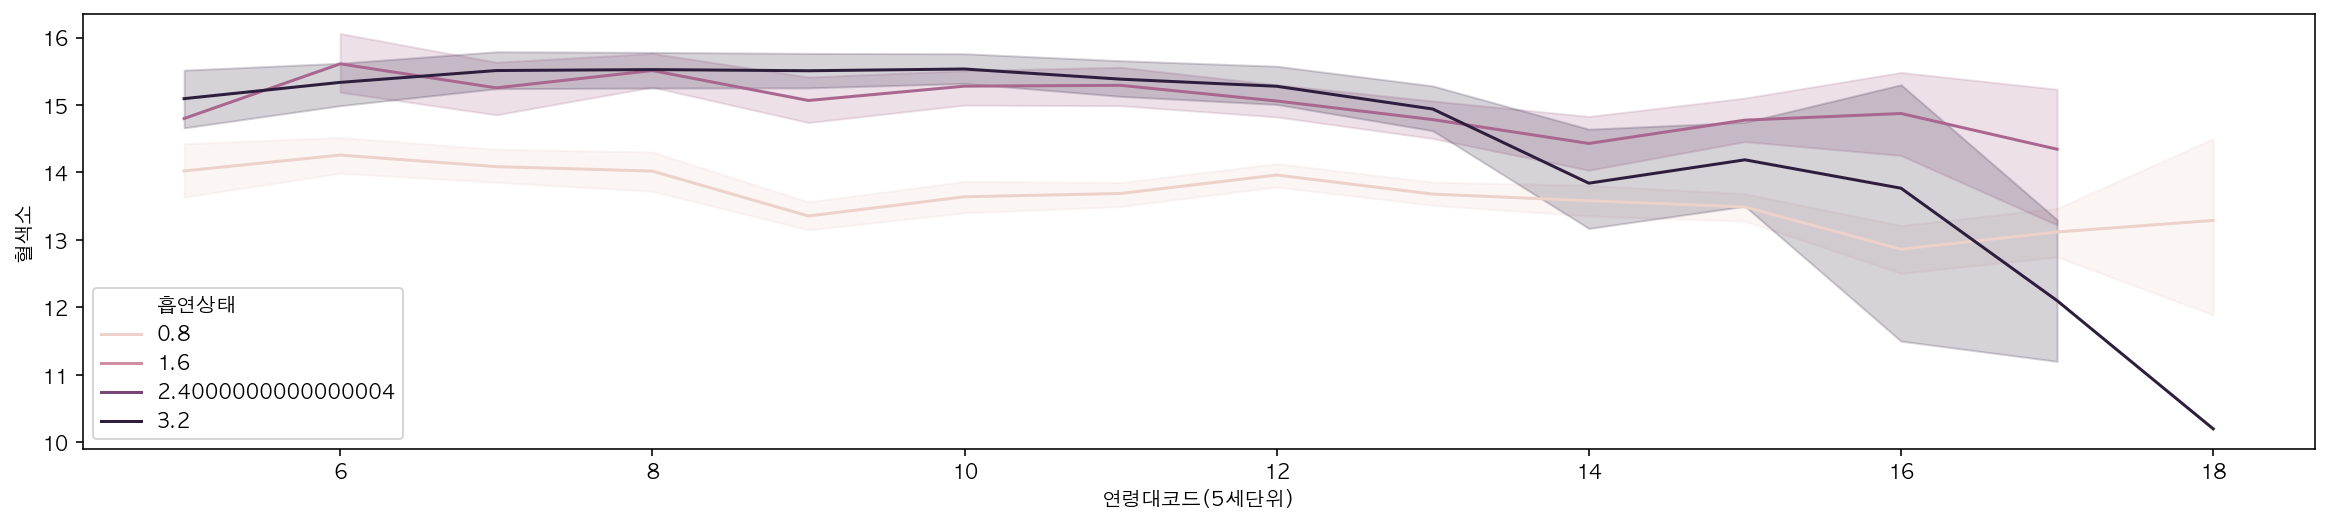

In [57]:
plt.figure(figsize=(20, 4))
sns.lineplot(data=df_sample, 
            x="연령대코드(5세단위)", y="혈색소", hue="흡연상태")

### boxplot

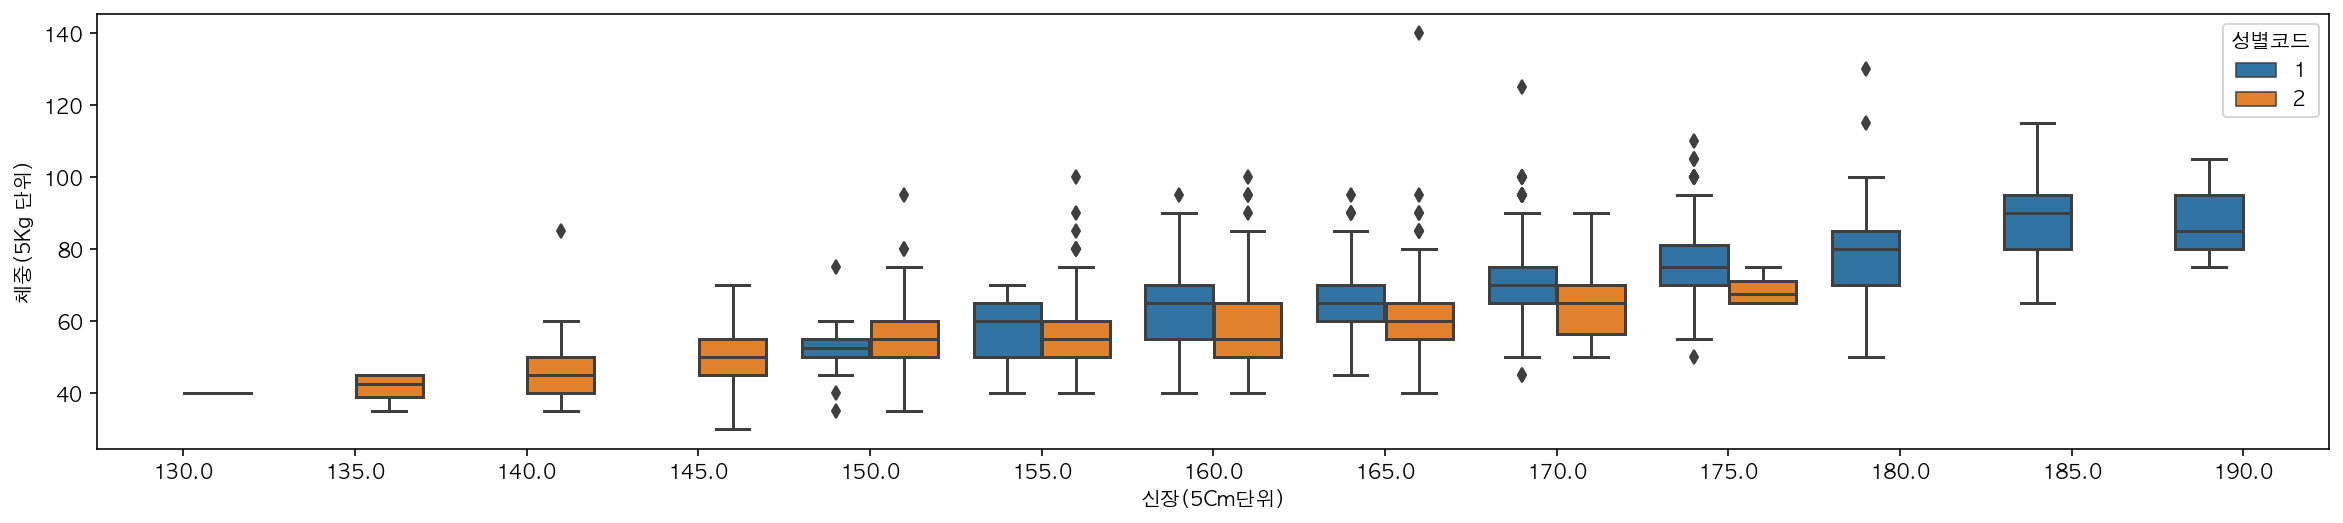

In [58]:
plt.figure(figsize=(20, 4))
sns.boxplot(data=df_sample, 
            x="신장(5Cm단위)",  y="체중(5Kg 단위)", hue="성별코드")

### violinplot

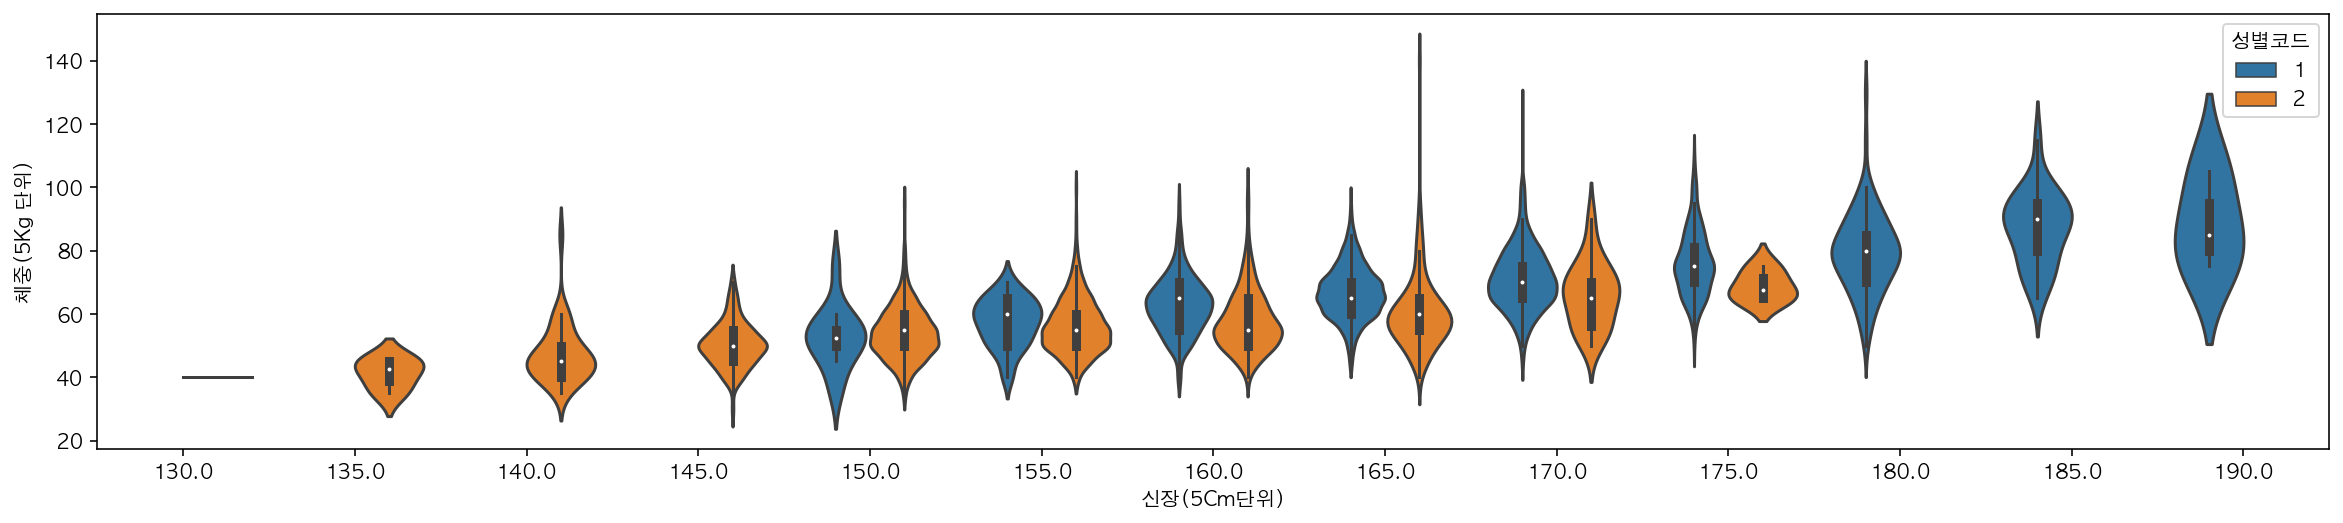

In [59]:
plt.figure(figsize=(20, 4))
sns.violinplot(data=df_sample, 
            x="신장(5Cm단위)",  y="체중(5Kg 단위)", hue="성별코드")

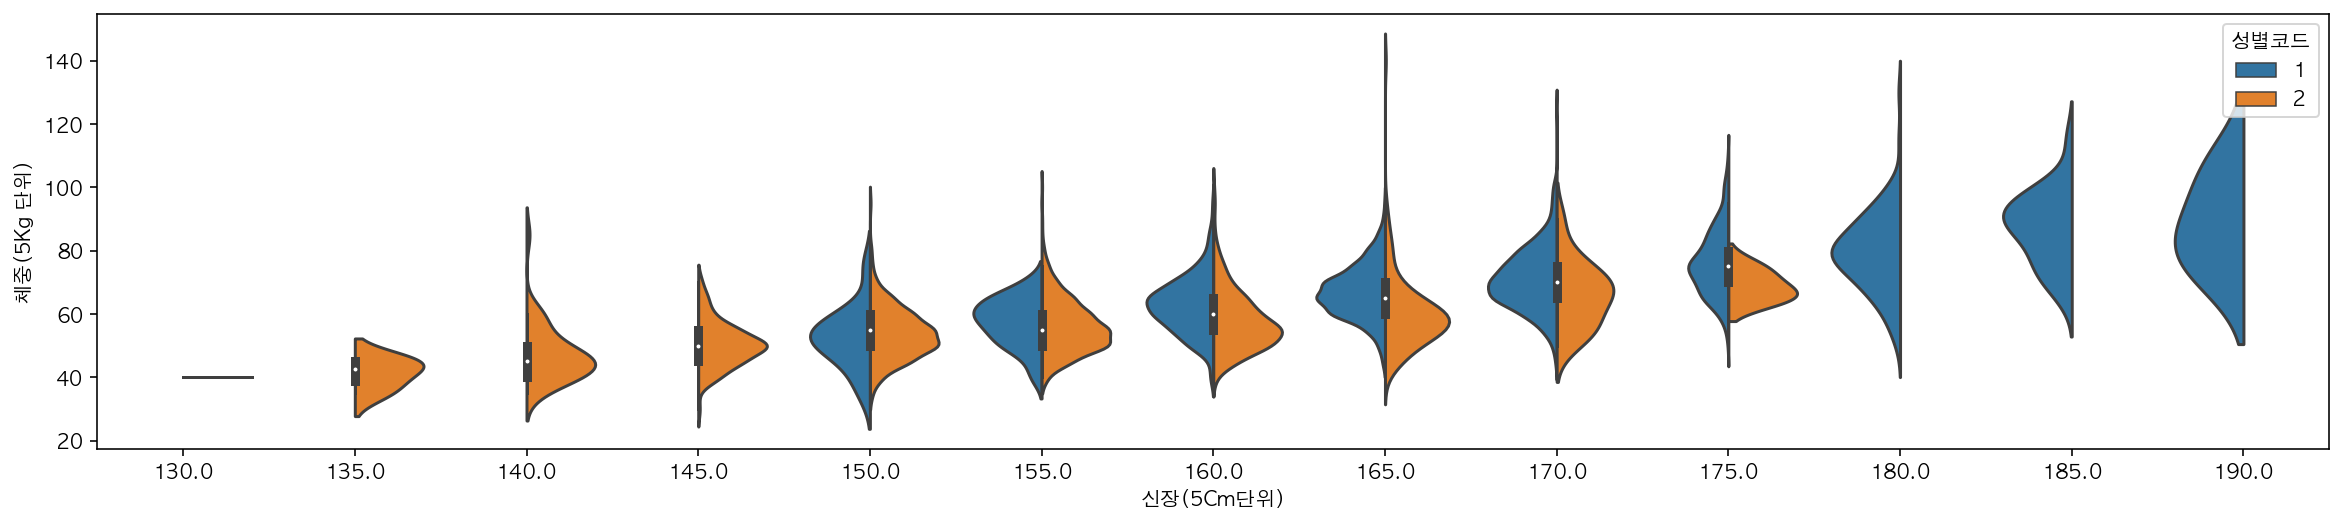

In [60]:
plt.figure(figsize=(20, 4))
sns.violinplot(data=df_sample, 
            x="신장(5Cm단위)",  y="체중(5Kg 단위)", hue="성별코드", split=True)

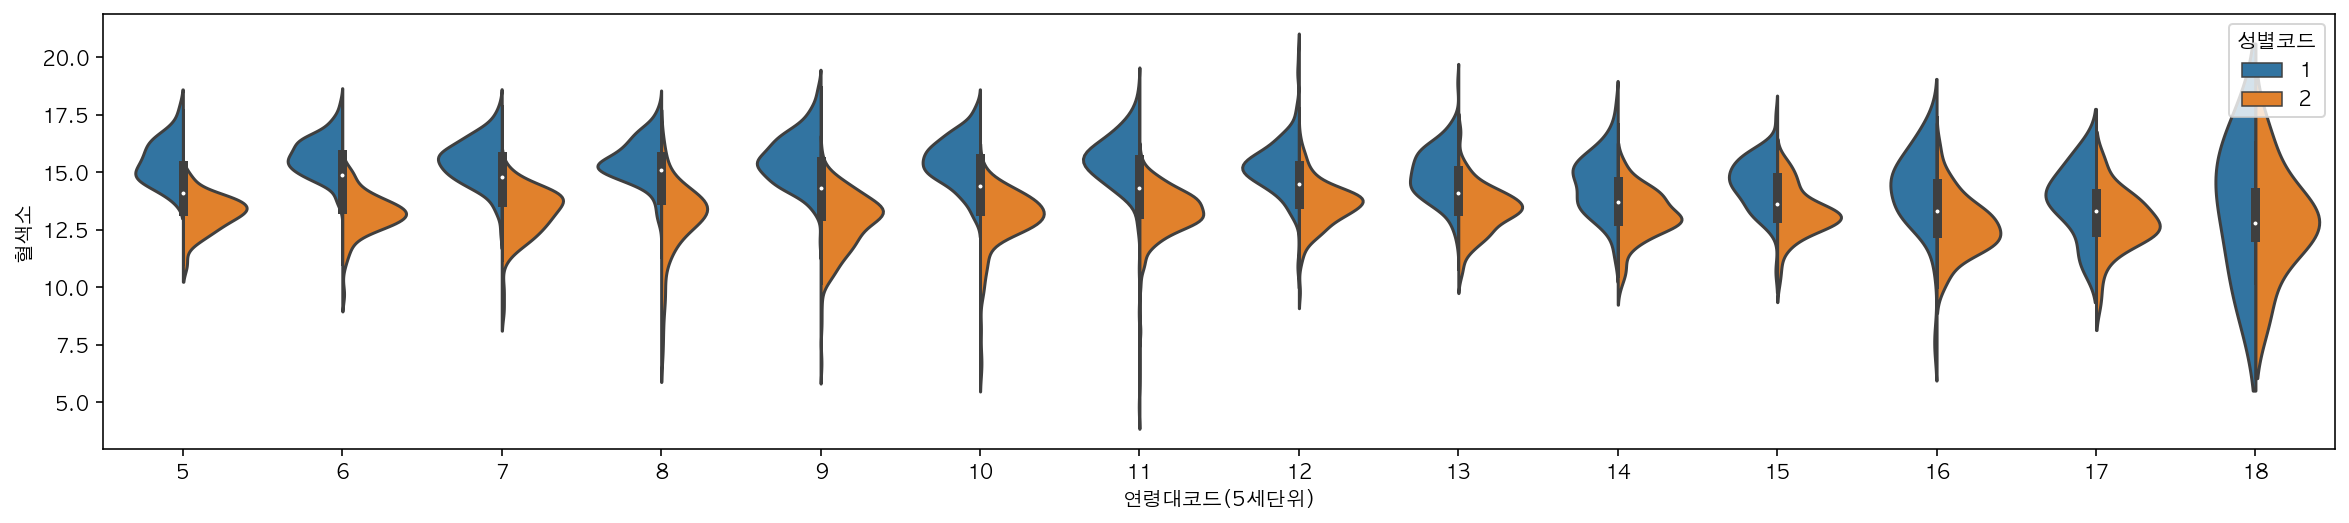

In [61]:
plt.figure(figsize=(20, 4))
sns.violinplot(data=df_sample, 
            x="연령대코드(5세단위)",  y="혈색소", hue="성별코드", split=True)

### swarm plot
* 범주형 데이터의 시각화

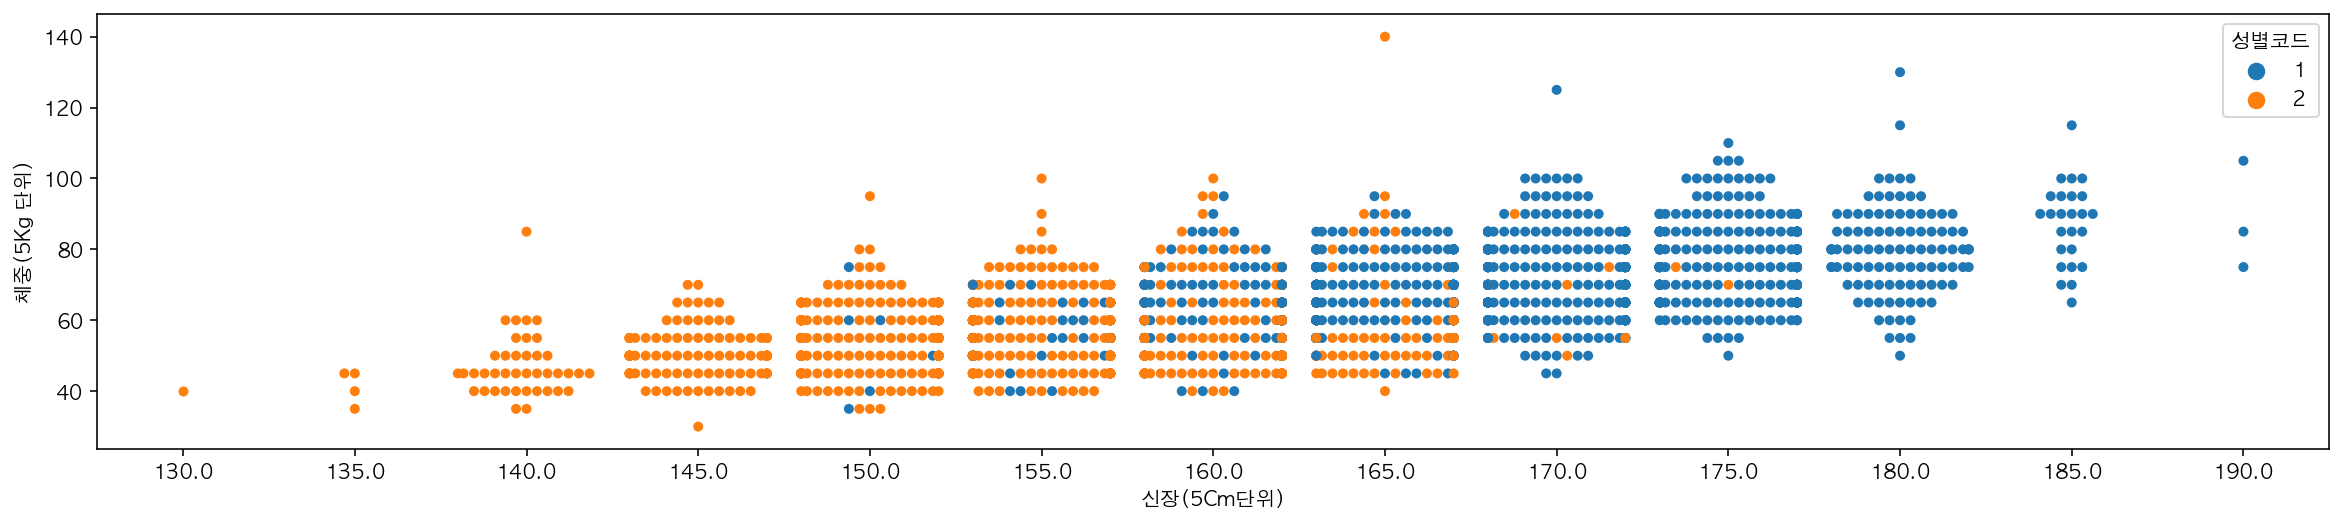

In [62]:
plt.figure(figsize=(20, 4))
sns.swarmplot(data=df_sample, 
            x="신장(5Cm단위)",  y="체중(5Kg 단위)", hue="성별코드")

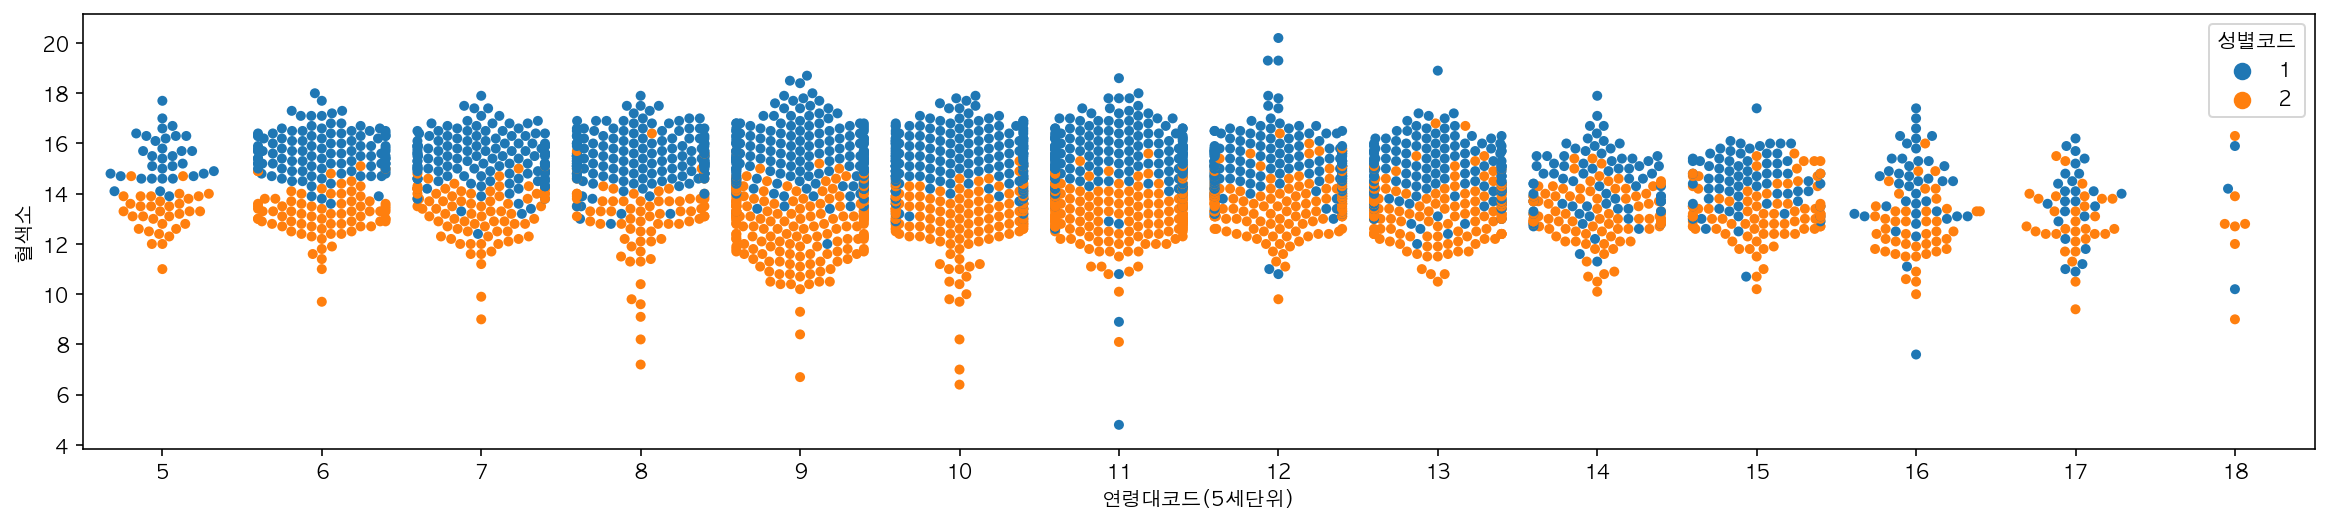

In [63]:
plt.figure(figsize=(20, 4))
sns.swarmplot(data=df_sample, 
            x="연령대코드(5세단위)", y="혈색소", hue="성별코드")

## 수치형 데이터 시각화

### lmplot - 상관 관계를 보기

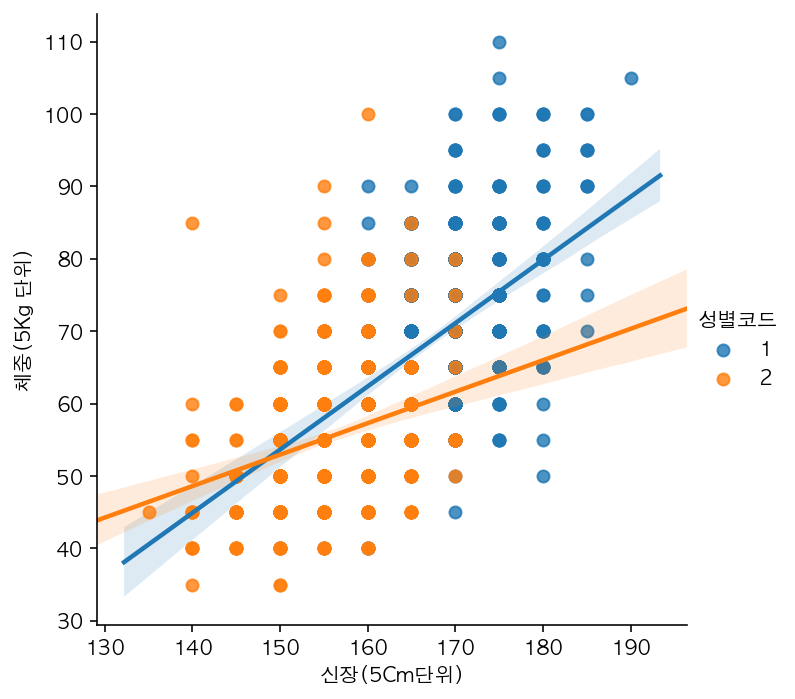

In [64]:
sns.lmplot(
    data=df_sample[:1000], x="신장(5Cm단위)",  y="체중(5Kg 단위)", hue="성별코드")

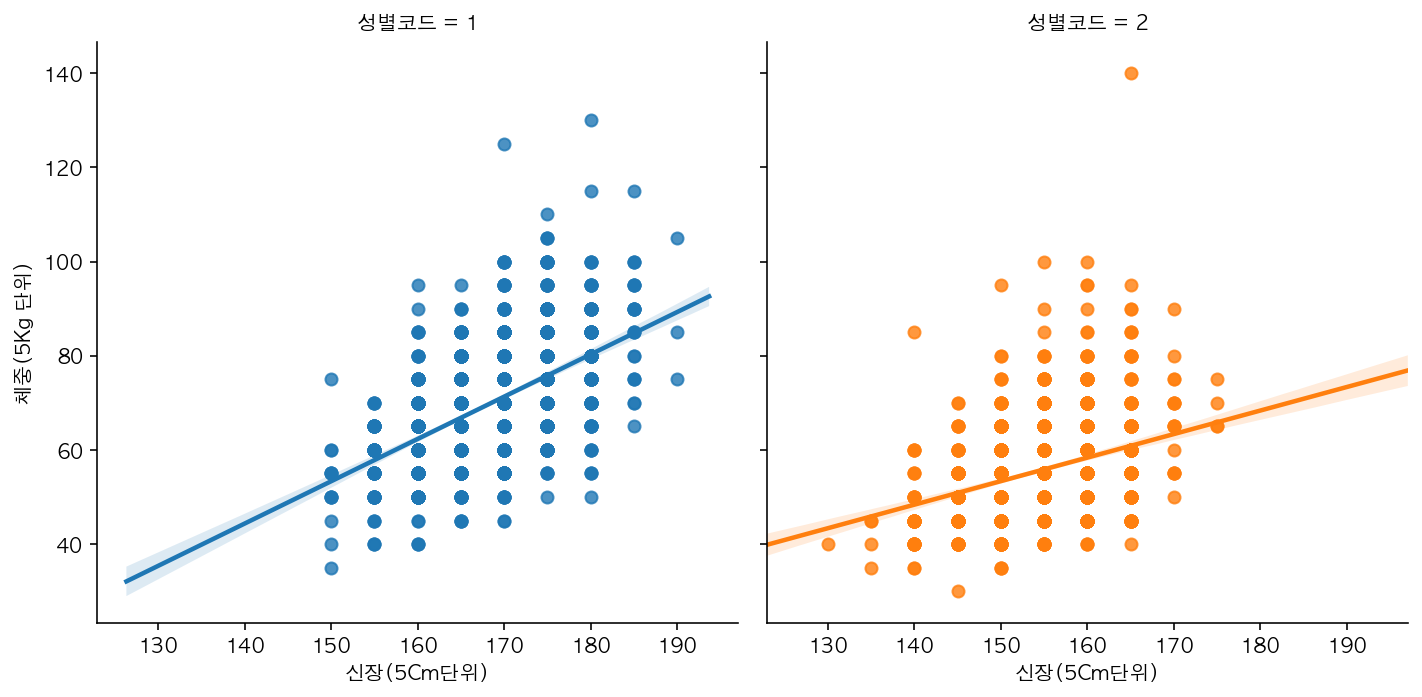

In [65]:
sns.lmplot(
    data=df_sample, x="신장(5Cm단위)",  y="체중(5Kg 단위)", hue="성별코드", col="성별코드")

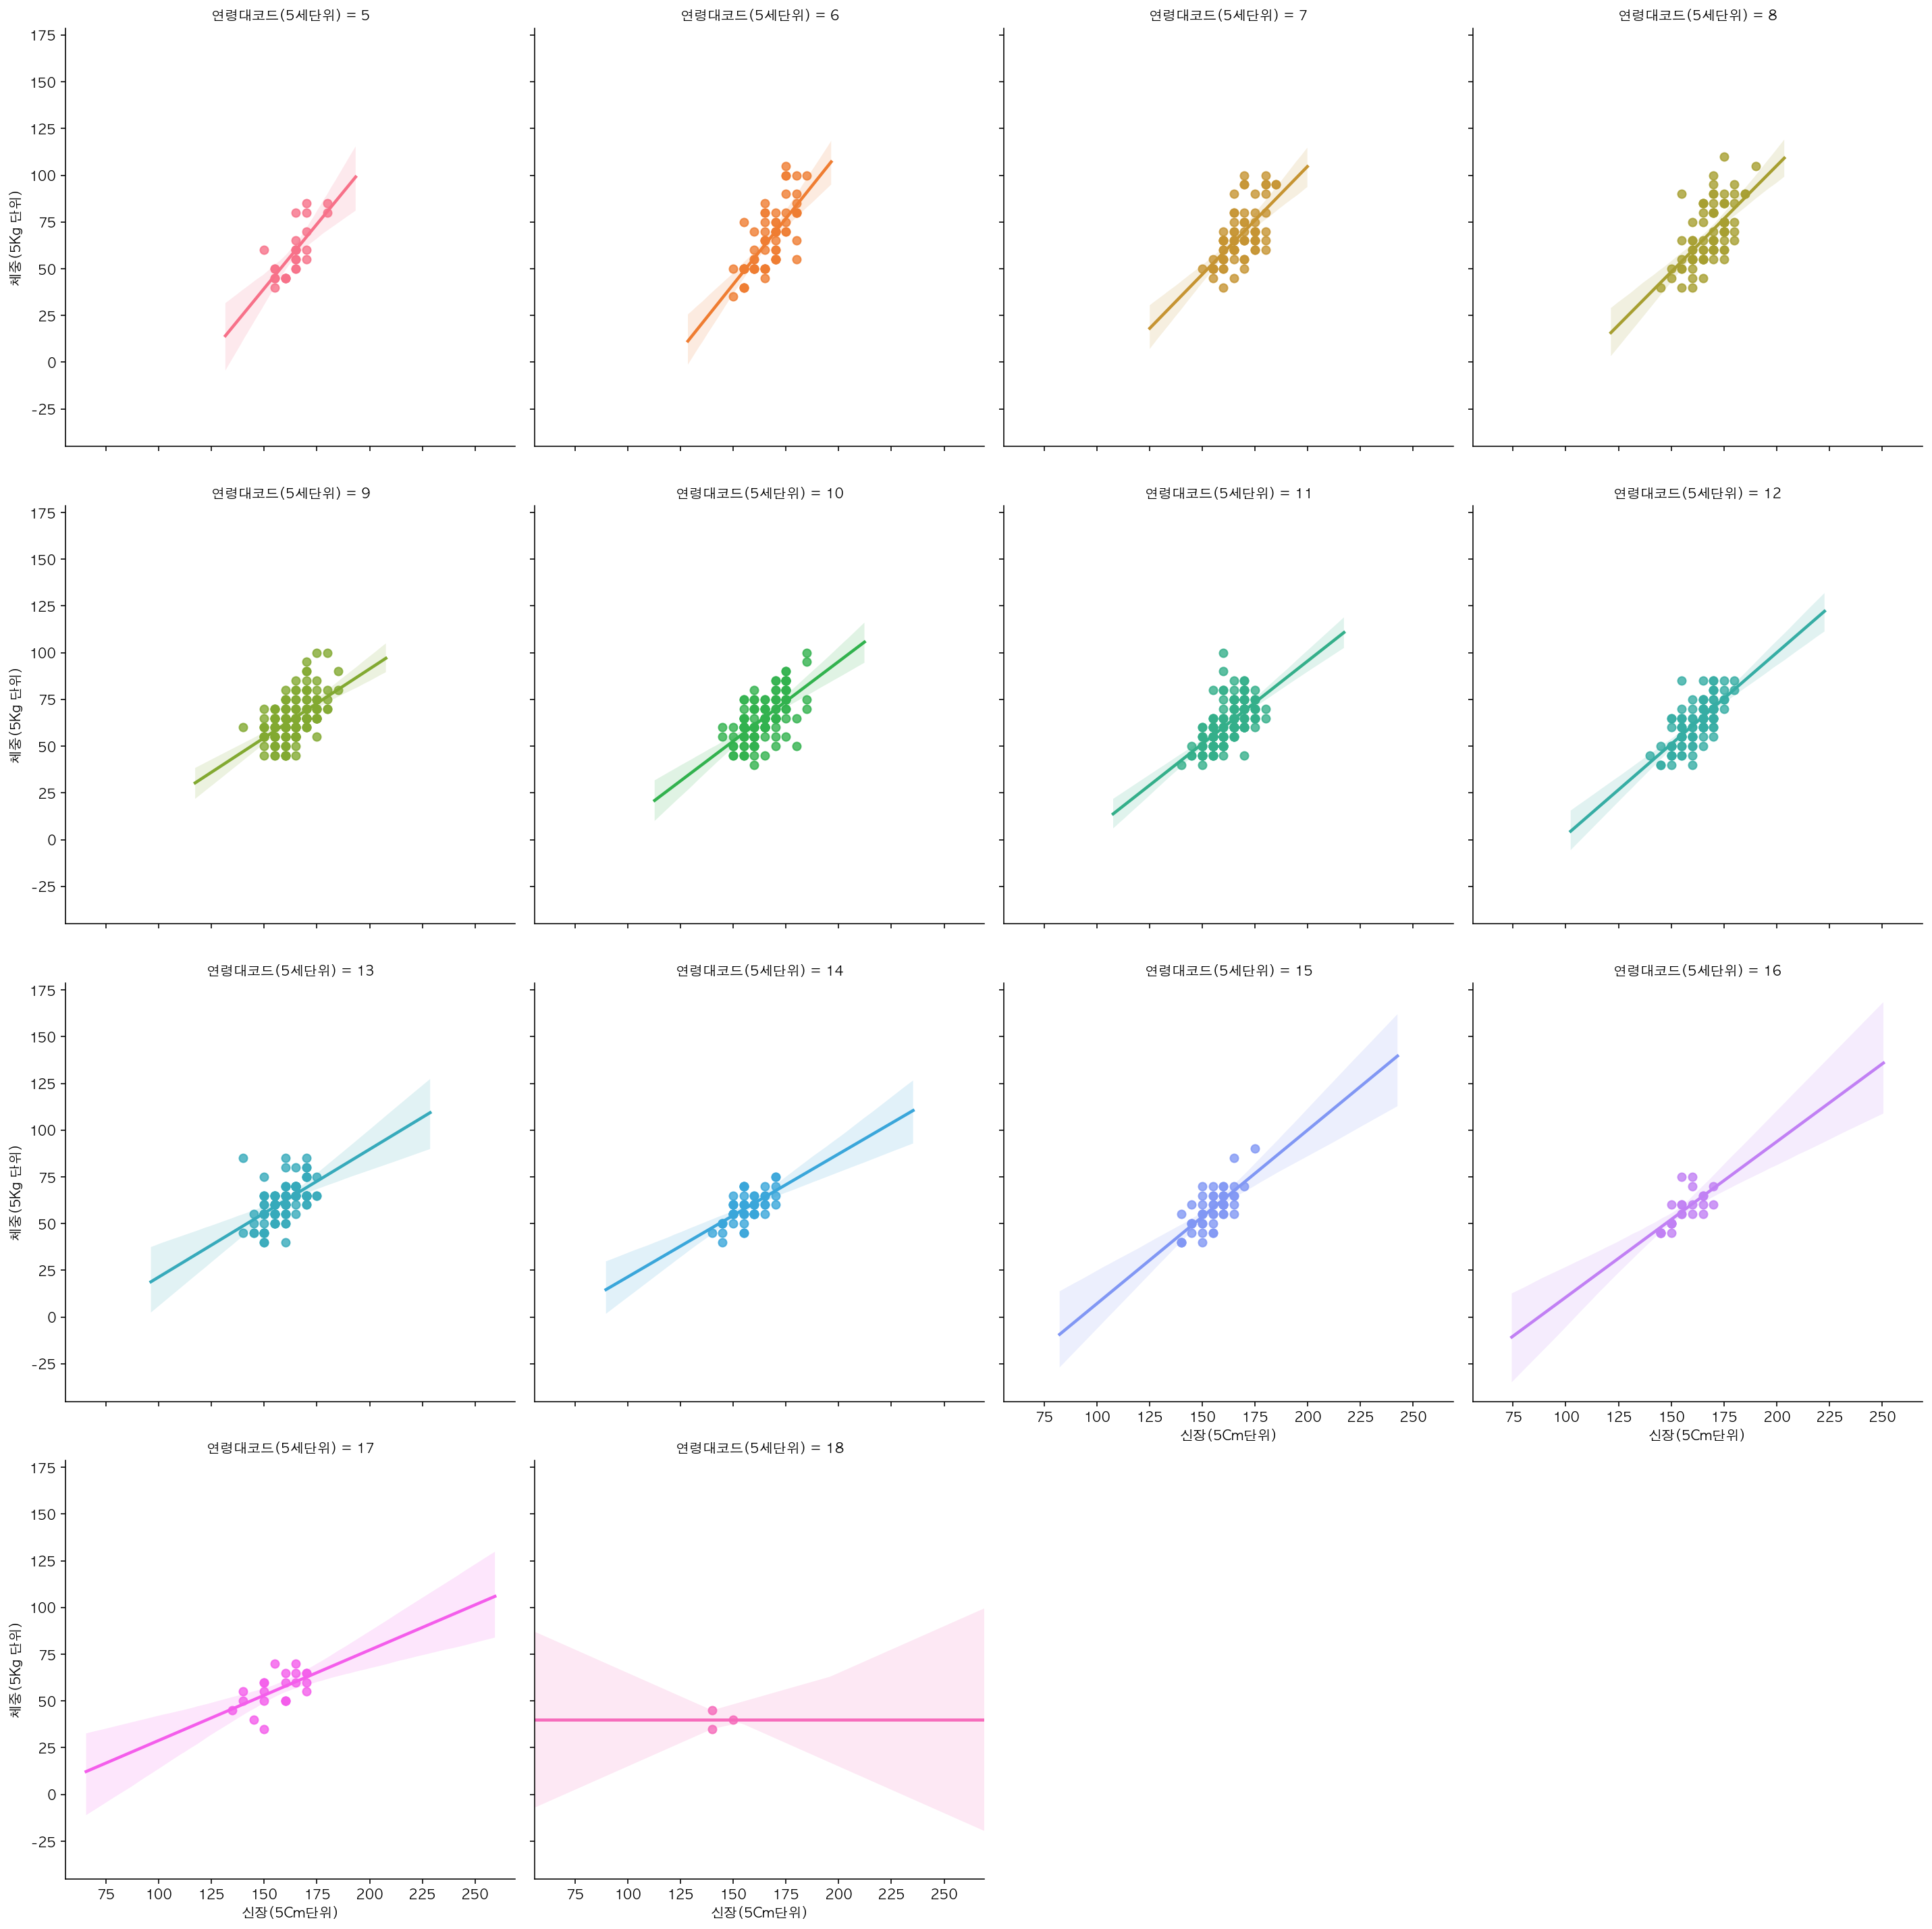

In [66]:
sns.lmplot(
    data=df_sample[:1000], x="신장(5Cm단위)",  y="체중(5Kg 단위)", 
    hue="연령대코드(5세단위)", col="연령대코드(5세단위)", col_wrap=4)

In [67]:
df_eye = df_sample[(df_sample["시력(좌)"] < 3) & (df_sample["시력(우)"] < 3)]

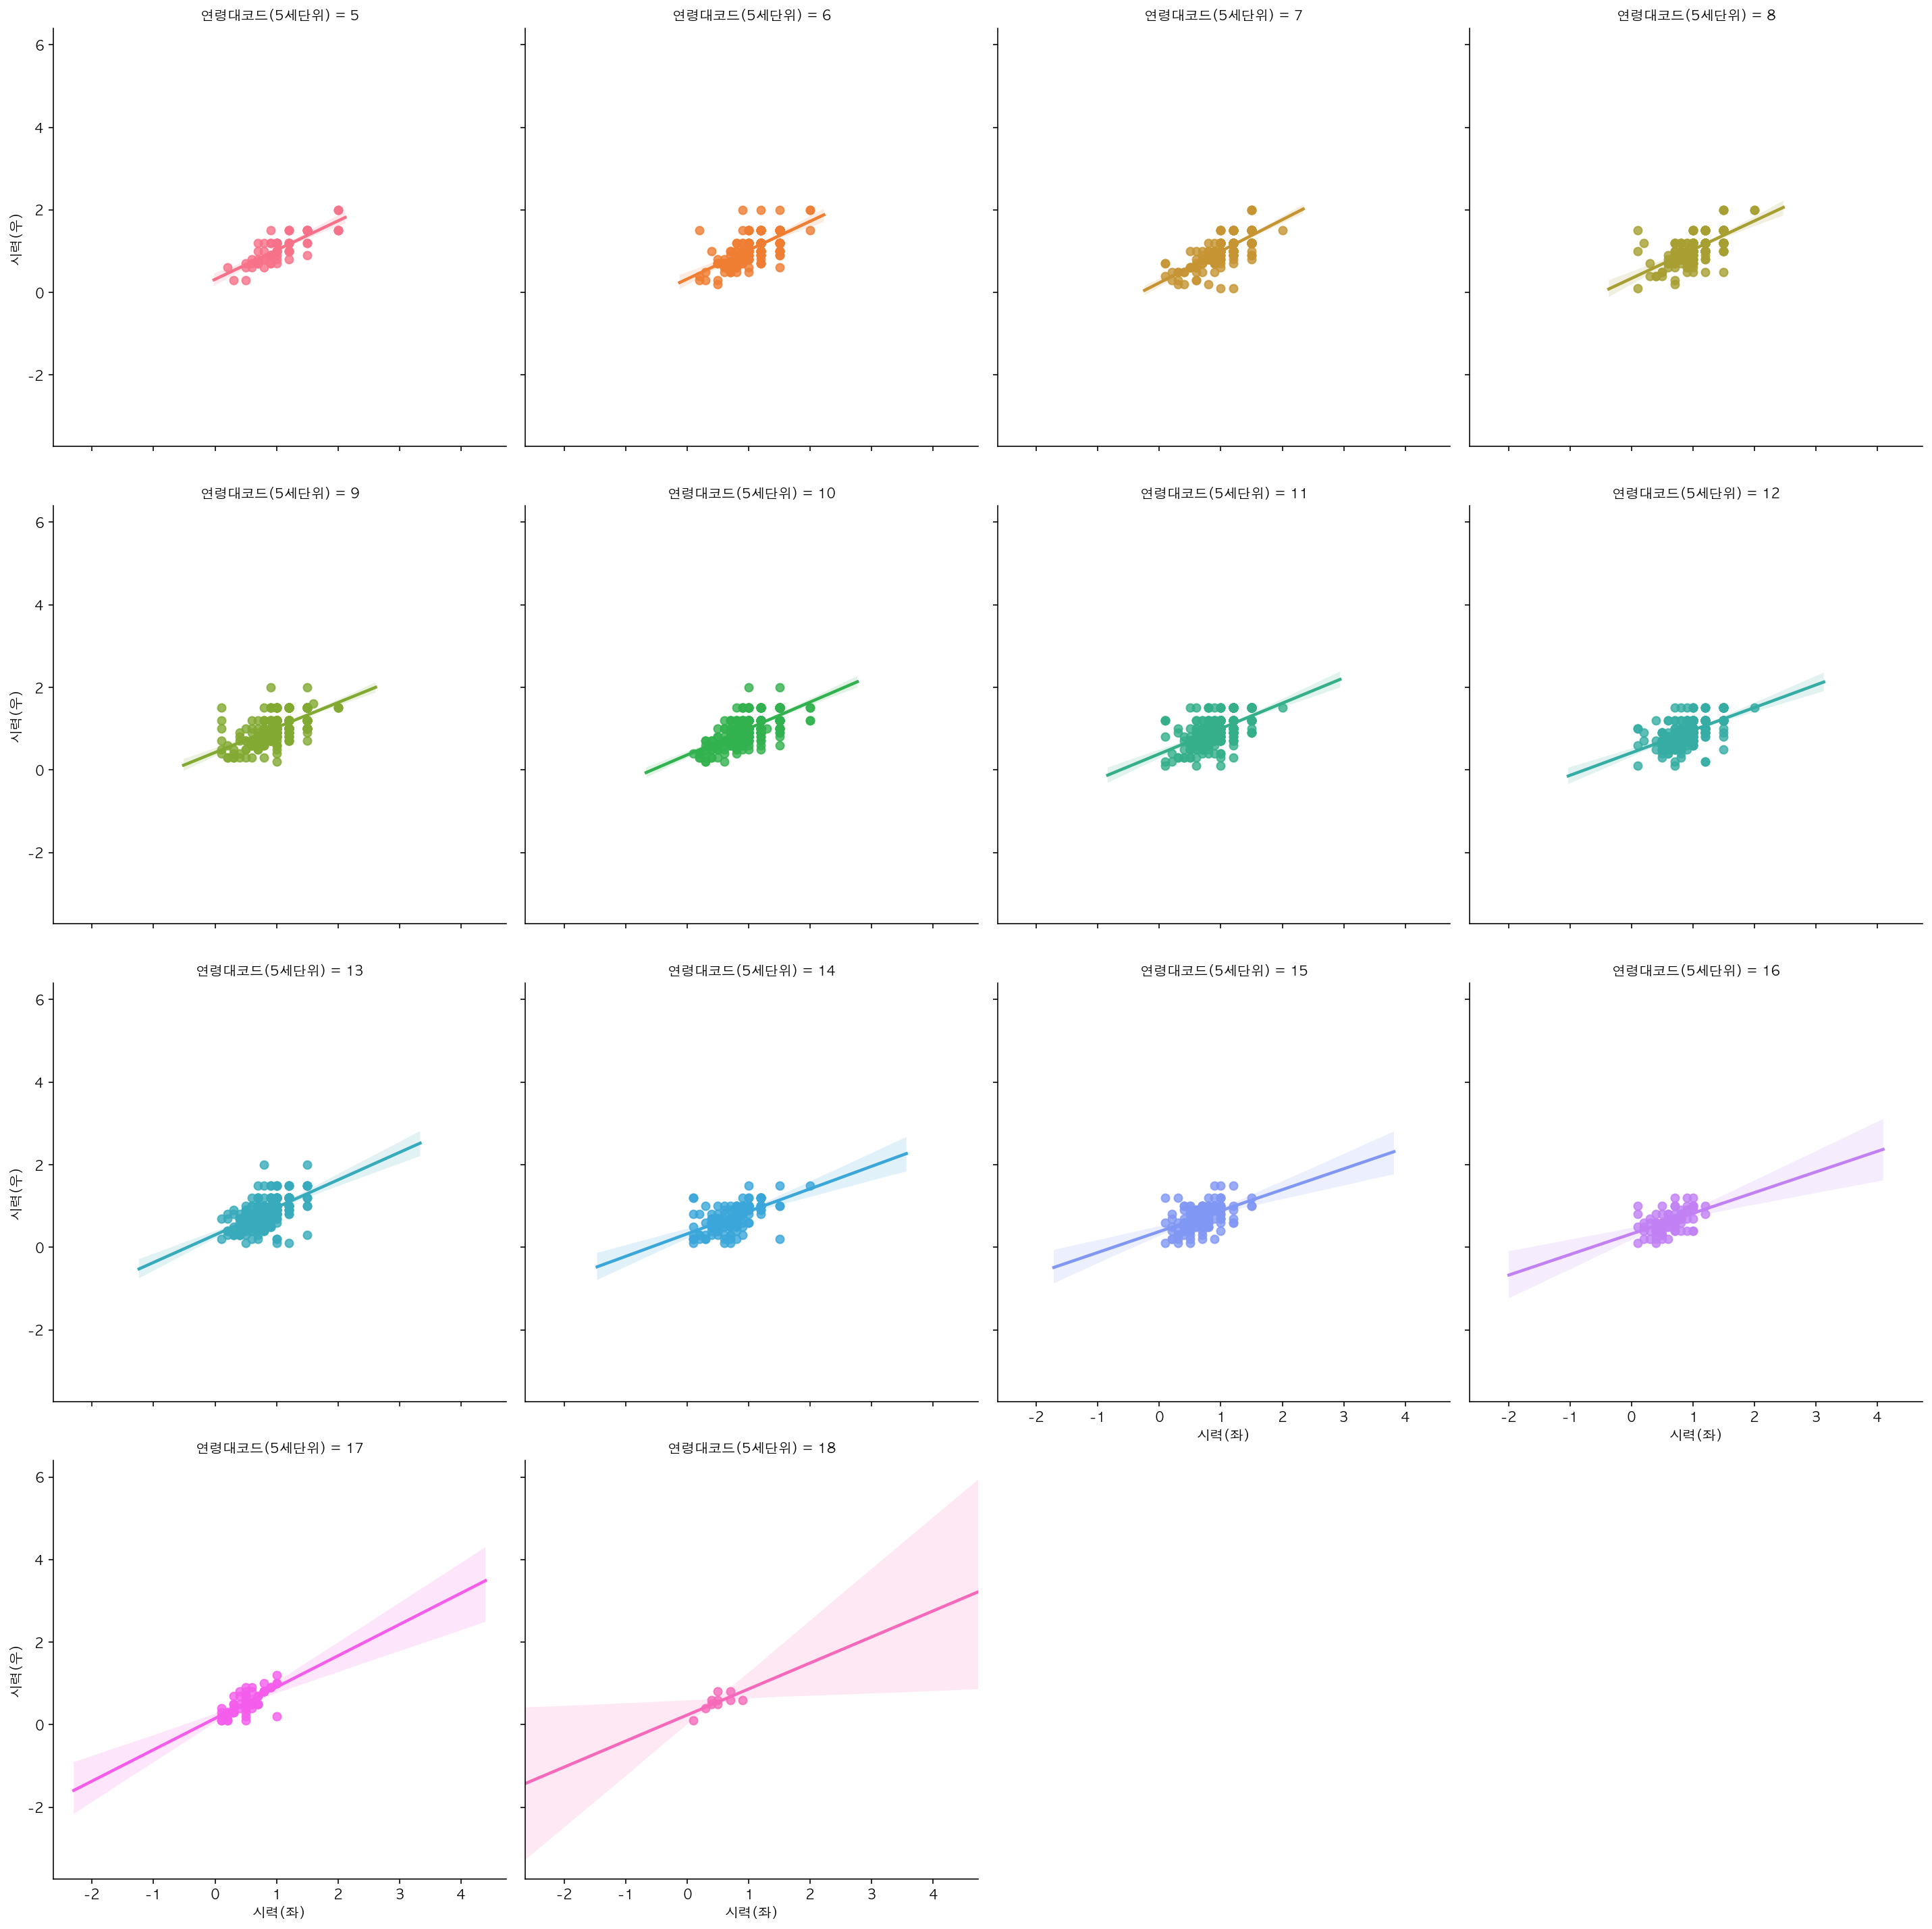

In [68]:
sns.lmplot(
    data=df_eye, 
    x="시력(좌)", y="시력(우)", hue="연령대코드(5세단위)", 
    col="연령대코드(5세단위)", col_wrap=4)

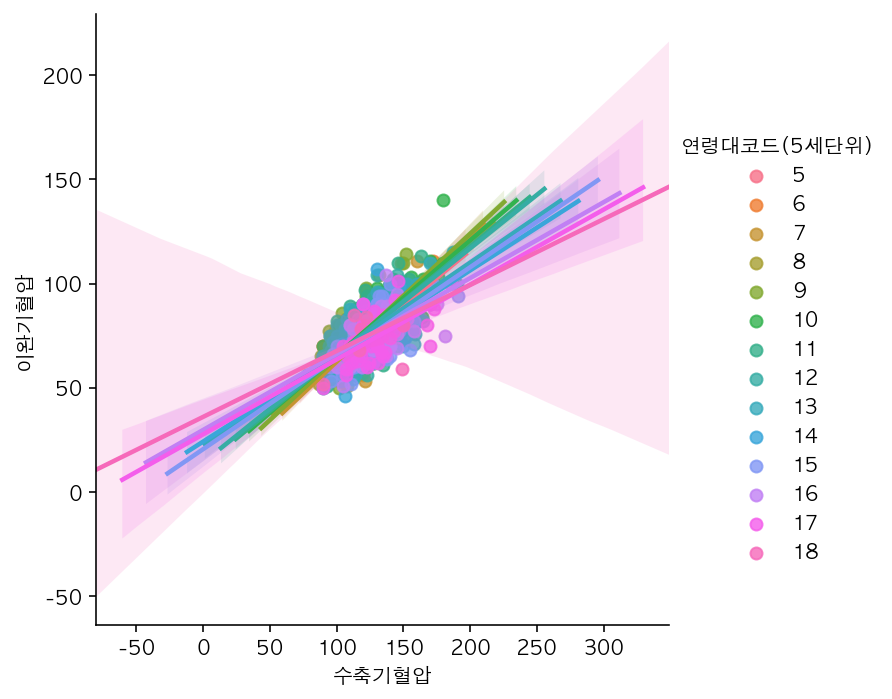

In [69]:
sns.lmplot(data=df_sample, x="수축기혈압", y="이완기혈압", hue="연령대코드(5세단위)")

`AST와 ALT`

```
AST와 ALT는 간세포에 들어 있는 효소 입니다.

간이 손상돼 간세포가 파괴되면 그 안에 있던 AST와 ALT 가 빠져 나와 혈액 속에 섞여 돌아다니게 됩니다. 따라서 간이 손상되면 AST와 ALT 수치가 높아집니다.

정상 수치는 병원에 따라 기준치가 다소 차이가 있으나 AST가 5~35 IU/L, ALT가 5~40 IU/L 정도 입니다.

 

간혹 전날 술을 마시거나 몸이 피곤하면 일시적으로 AST와 ALT 수치가 정상치를 웃돌 수 있으므로 딱 한 번의 검사만으로 간질환 여부를 판단하는 경우는 드뭅니다. 하지만 AST 와 ALT 같은 간수치는 간의 상태를 일차적으로 파악하는데 아주 중요한 기준이 됩니다.
```

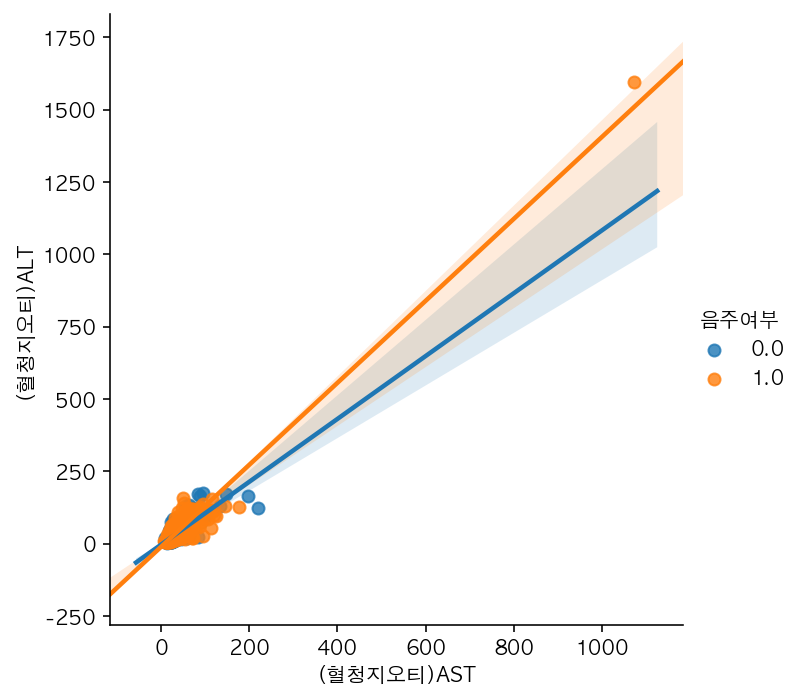

In [70]:
sns.lmplot(data=df_sample, x="(혈청지오티)AST", y="(혈청지오티)ALT", hue="음주여부")

In [71]:
df_ASLT = df_sample[
    ( df_sample["(혈청지오티)AST"] < 400 ) & 
    ( df_sample["(혈청지오티)ALT"] < 400 )]

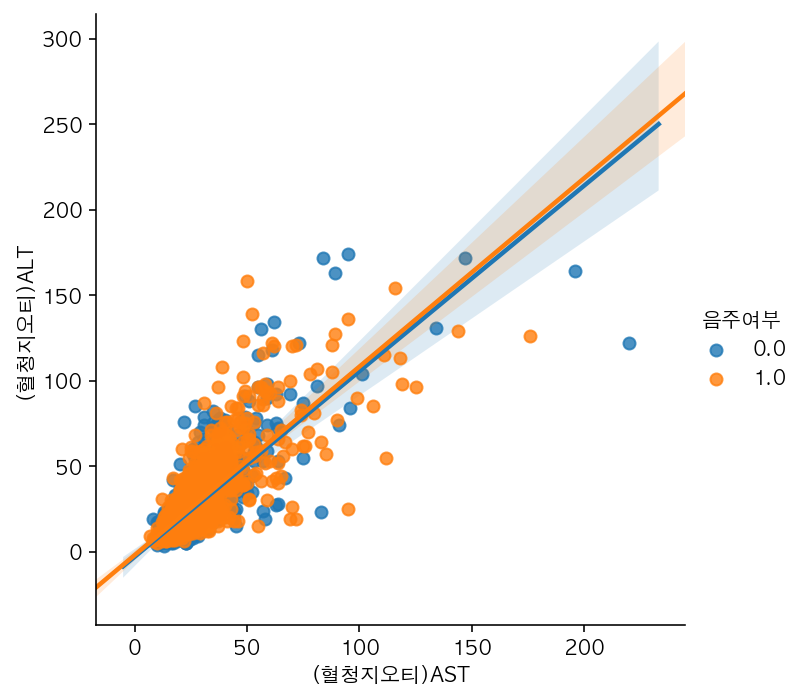

In [72]:
sns.lmplot(data=df_ASLT, x="(혈청지오티)AST", y="(혈청지오티)ALT", hue="음주여부")

In [73]:
df_ASLT_high = df[
    ( df["(혈청지오티)AST"] > 400 ) & 
    ( df["(혈청지오티)ALT"] > 400 )]

In [74]:
df_ASLT_high.head()

기준년도  가입자일련번호  성별코드  연령대코드(5세단위)  시도코드  신장(5Cm단위)  체중(5Kg 단위)  허리둘레  \
2771   2017     2772     1            8    44      170.0        65.0  82.2   
5047   2017     5048     1            7    31      170.0        60.0  77.0   
16433  2017    16434     2           12    44      160.0        65.0  86.0   
22868  2017    22869     1           11    48      165.0        60.0  84.0   
28956  2017    28957     1           14    11      160.0        70.0  95.0   

       시력(좌)  시력(우)  ...  감마지티피  흡연상태  음주여부  구강검진 수검여부  치아우식증유무  결손치유무  \
2771     1.0    0.9  ...  280.0   3.0   1.0          0      NaN    NaN   
5047     1.5    1.5  ...   33.0   1.0   1.0          1      NaN    NaN   
16433    1.0    1.0  ...  672.0   1.0   0.0          0      NaN    NaN   
22868    0.9    0.8  ...  464.0   2.0   1.0          0      NaN    NaN   
28956    0.1    0.2  ...  297.0   1.0   0.0          0      NaN    NaN   

       치아마모증유무  제3대구치(사랑니)이상   치석   데이터공개일자  
2771       NaN           NaN  NaN  20181126  
5047       NaN           NaN  0.0  20181126  
16433      NaN           NaN  NaN  20181126  
22868      NaN           NaN  NaN  20181126  
28956      NaN           NaN  NaN  20181126  

[5 rows x 34 columns]

### scatterplot - 산점도
* 수치형 vs 수치형 데이터의 상관 관계를 볼 때 주로 사용합니다.
* 점의 크기를 데이터의 수치에 따라 다르게 볼 수 있습니다.

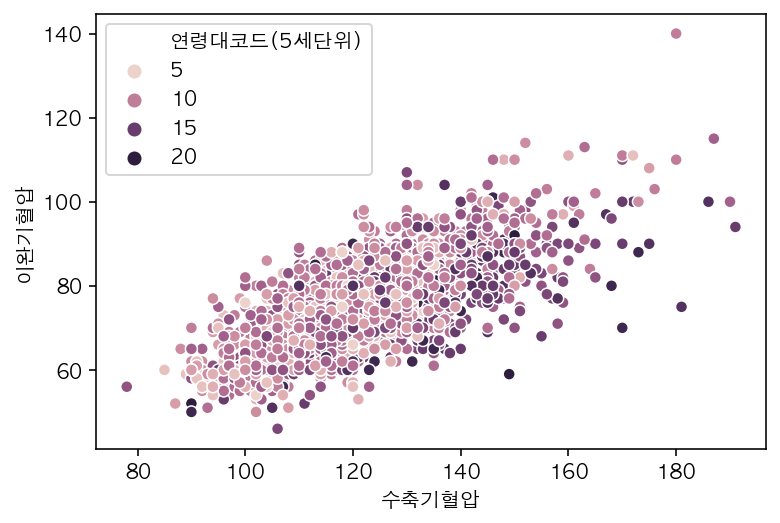

In [75]:
sns.scatterplot(data=df_sample, x="수축기혈압", y="이완기혈압", hue="연령대코드(5세단위)")

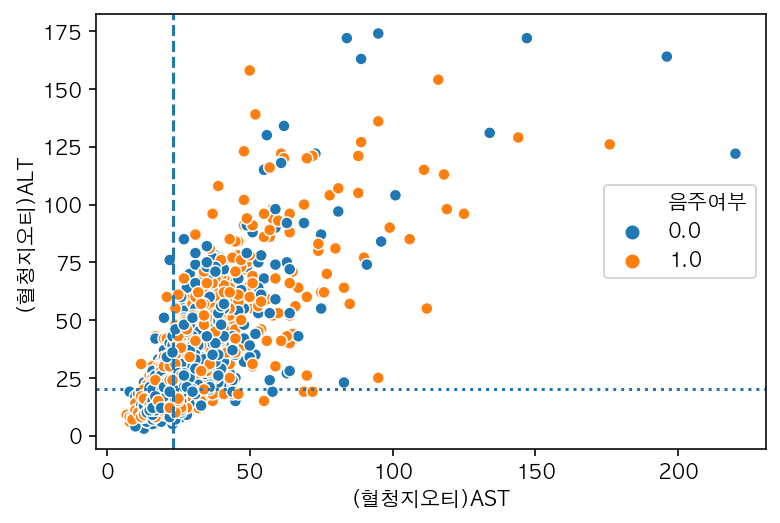

In [76]:
plt.axvline(df_ASLT["(혈청지오티)AST"].median(), linestyle='--')
plt.axhline(df_ASLT["(혈청지오티)ALT"].median(), linestyle=':')
sns.scatterplot(data=df_ASLT, x="(혈청지오티)AST", y="(혈청지오티)ALT", hue="음주여부")

### distplot

In [77]:
df_sample.columns

Index(['기준년도', '가입자일련번호', '성별코드', '연령대코드(5세단위)', '시도코드', '신장(5Cm단위)',
       '체중(5Kg 단위)', '허리둘레', '시력(좌)', '시력(우)', '청력(좌)', '청력(우)', '수축기혈압',
       '이완기혈압', '식전혈당(공복혈당)', '총콜레스테롤', '트리글리세라이드', 'HDL콜레스테롤', 'LDL콜레스테롤',
       '혈색소', '요단백', '혈청크레아티닌', '(혈청지오티)AST', '(혈청지오티)ALT', '감마지티피', '흡연상태',
       '음주여부', '구강검진 수검여부', '치아우식증유무', '결손치유무', '치아마모증유무', '제3대구치(사랑니)이상',
       '치석', '데이터공개일자'],
      dtype='object')

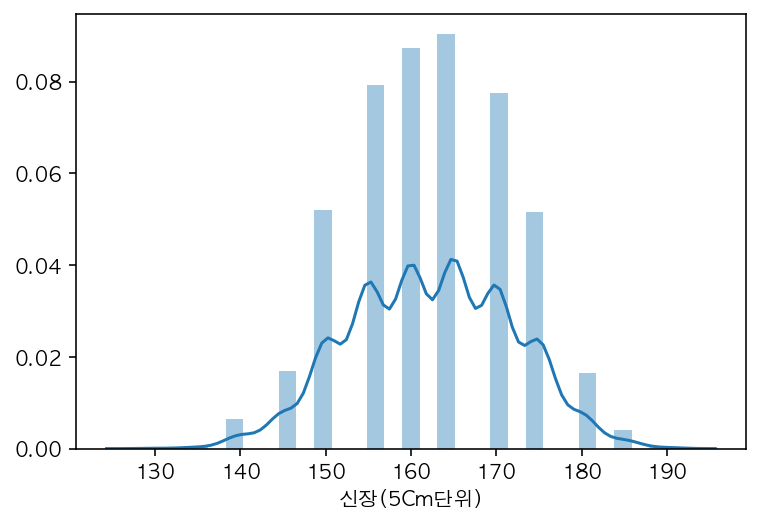

In [78]:
sns.distplot(df_sample.loc[df_sample["신장(5Cm단위)"].notnull(), "신장(5Cm단위)"])

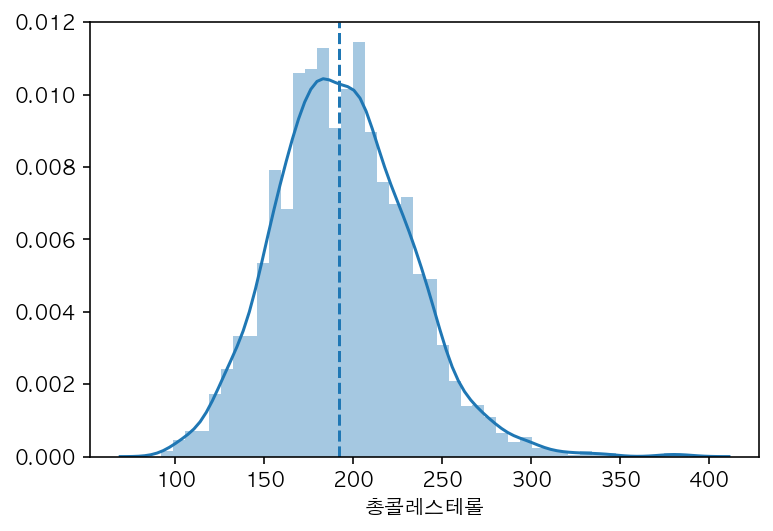

In [79]:
plt.axvline(df_sample["총콜레스테롤"].median(), linestyle='dashed')
sns.distplot(df_sample["총콜레스테롤"])

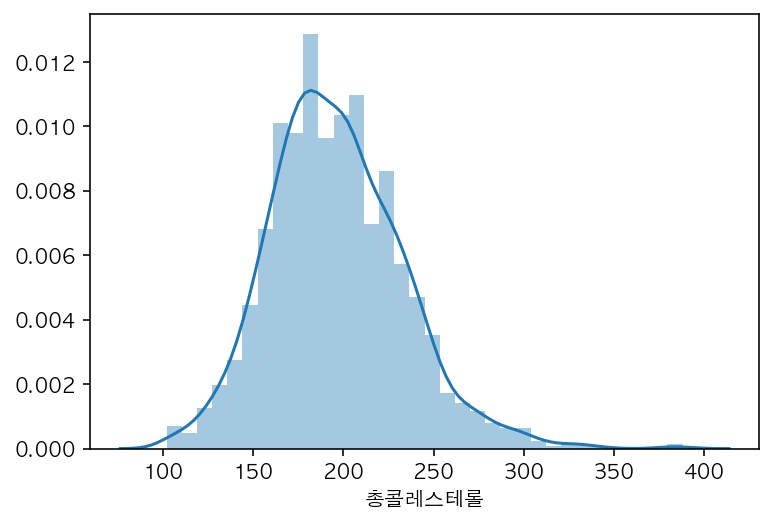

In [80]:
sns.distplot(df_sample.loc[df_sample["음주여부"] == 1, "총콜레스테롤"])

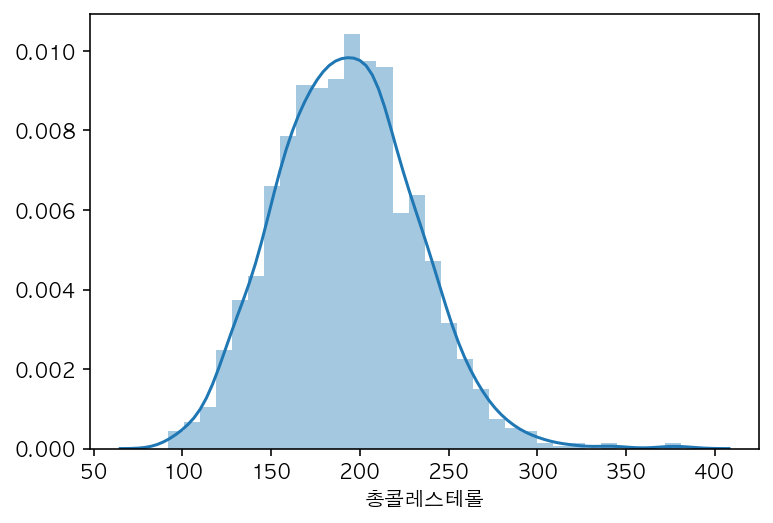

In [81]:
sns.distplot(df_sample.loc[df_sample["음주여부"] == 0, "총콜레스테롤"])

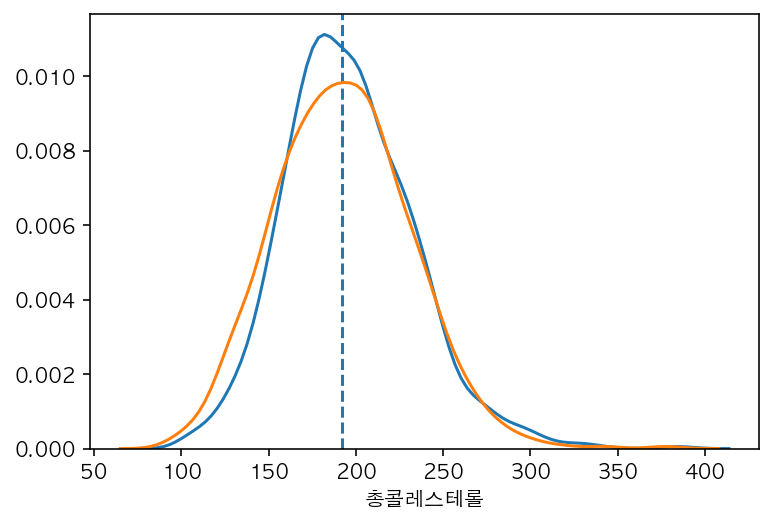

In [82]:
plt.axvline(df_sample["총콜레스테롤"].median(), linestyle='dashed')
sns.distplot(df_sample.loc[df_sample["음주여부"] == 1, "총콜레스테롤"], hist=False)
sns.distplot(df_sample.loc[df_sample["음주여부"] == 0, "총콜레스테롤"], hist=False)

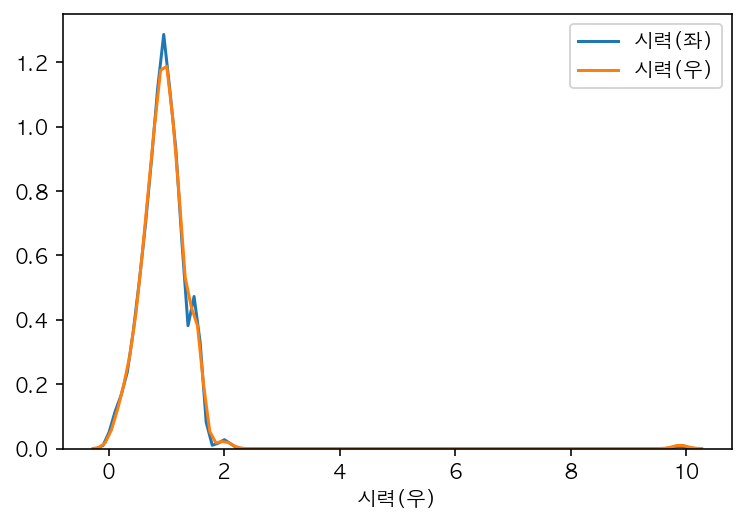

In [83]:
sns.distplot(df_sample.loc[df_sample["시력(좌)"].notnull(), "시력(좌)"],
             hist=False, label="시력(좌)")
sns.distplot(df_sample.loc[df_sample["시력(우)"].notnull(), "시력(우)"], 
             hist=False, label="시력(우)")

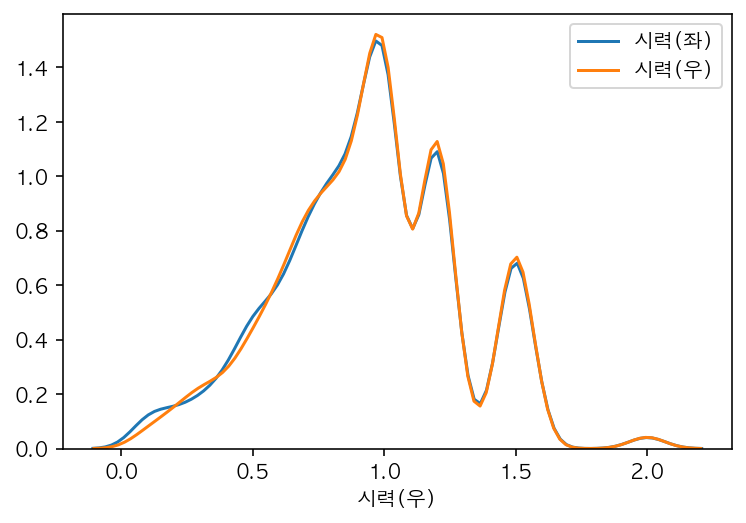

In [84]:
sns.distplot(df_eye["시력(좌)"], label="시력(좌)", hist=False)
sns.distplot(df_eye["시력(우)"], label="시력(우)", hist=False)

## 상관 분석
* [상관 분석 - 위키백과, 우리 모두의 백과사전](https://ko.wikipedia.org/wiki/%EC%83%81%EA%B4%80_%EB%B6%84%EC%84%9D)

```
r이 -1.0과 -0.7 사이이면, 강한 음적 선형관계,
r이 -0.7과 -0.3 사이이면, 뚜렷한 음적 선형관계,
r이 -0.3과 -0.1 사이이면, 약한 음적 선형관계,
r이 -0.1과 +0.1 사이이면, 거의 무시될 수 있는 선형관계,
r이 +0.1과 +0.3 사이이면, 약한 양적 선형관계,
r이 +0.3과 +0.7 사이이면, 뚜렷한 양적 선형관계,
r이 +0.7과 +1.0 사이이면, 강한 양적 선형관계
```

In [85]:
columns = ['연령대코드(5세단위)', '체중(5Kg 단위)', '신장(5Cm단위)', '허리둘레', 
           '시력(좌)', '시력(우)', '청력(좌)', '청력(우)', 
           '수축기혈압', '이완기혈압', '식전혈당(공복혈당)', 
           '총콜레스테롤', '트리글리세라이드', 'HDL콜레스테롤', 'LDL콜레스테롤', '혈색소', '요단백', 
           '혈청크레아티닌', '(혈청지오티)AST', '(혈청지오티)ALT', '감마지티피', '흡연상태', '음주여부']
columns

['연령대코드(5세단위)',
 '체중(5Kg 단위)',
 '신장(5Cm단위)',
 '허리둘레',
 '시력(좌)',
 '시력(우)',
 '청력(좌)',
 '청력(우)',
 '수축기혈압',
 '이완기혈압',
 '식전혈당(공복혈당)',
 '총콜레스테롤',
 '트리글리세라이드',
 'HDL콜레스테롤',
 'LDL콜레스테롤',
 '혈색소',
 '요단백',
 '혈청크레아티닌',
 '(혈청지오티)AST',
 '(혈청지오티)ALT',
 '감마지티피',
 '흡연상태',
 '음주여부']

In [86]:
df_sample.shape

(3000, 34)

In [87]:
df_small = df_sample[columns].sample(1000)
df_corr = df_small.corr()

In [88]:
df.columns

Index(['기준년도', '가입자일련번호', '성별코드', '연령대코드(5세단위)', '시도코드', '신장(5Cm단위)',
       '체중(5Kg 단위)', '허리둘레', '시력(좌)', '시력(우)', '청력(좌)', '청력(우)', '수축기혈압',
       '이완기혈압', '식전혈당(공복혈당)', '총콜레스테롤', '트리글리세라이드', 'HDL콜레스테롤', 'LDL콜레스테롤',
       '혈색소', '요단백', '혈청크레아티닌', '(혈청지오티)AST', '(혈청지오티)ALT', '감마지티피', '흡연상태',
       '음주여부', '구강검진 수검여부', '치아우식증유무', '결손치유무', '치아마모증유무', '제3대구치(사랑니)이상',
       '치석', '데이터공개일자'],
      dtype='object')

In [89]:
# 키에 대한 상관계수가 특정 수치 이상인 데이터를 봅니다.
df_corr.loc[df_corr["신장(5Cm단위)"] > 0.3, "신장(5Cm단위)"]

체중(5Kg 단위)    0.656741
신장(5Cm단위)     1.000000
허리둘레          0.314205
혈색소           0.494015
흡연상태          0.458026
음주여부          0.410030
Name: 신장(5Cm단위), dtype: float64

In [90]:
# 흡연상태에 대한 상관계수가 특정 수치 이상인 데이터를 봅니다.
df_corr.loc[df_corr["흡연상태"] > 0.3, "흡연상태"]

체중(5Kg 단위)    0.383295
신장(5Cm단위)     0.458026
혈색소           0.438607
흡연상태          1.000000
음주여부          0.375729
Name: 흡연상태, dtype: float64

In [91]:
# 음주여부에 대한 상관계수가 특정 수치 이상인 데이터를 봅니다.
df_corr.loc[df_corr["음주여부"] > 0.3, "음주여부"]

신장(5Cm단위)    0.410030
혈색소          0.329616
흡연상태         0.375729
음주여부         1.000000
Name: 음주여부, dtype: float64

In [92]:
# 혈색소에 대한 상관계수가 특정 수치 이상인 데이터를 봅니다.
df_corr.loc[df_corr["혈색소"] > 0.3, "혈색소"]

체중(5Kg 단위)    0.475907
신장(5Cm단위)     0.494015
허리둘레          0.360715
혈색소           1.000000
(혈청지오티)ALT    0.359197
흡연상태          0.438607
음주여부          0.329616
Name: 혈색소, dtype: float64

### heatmap

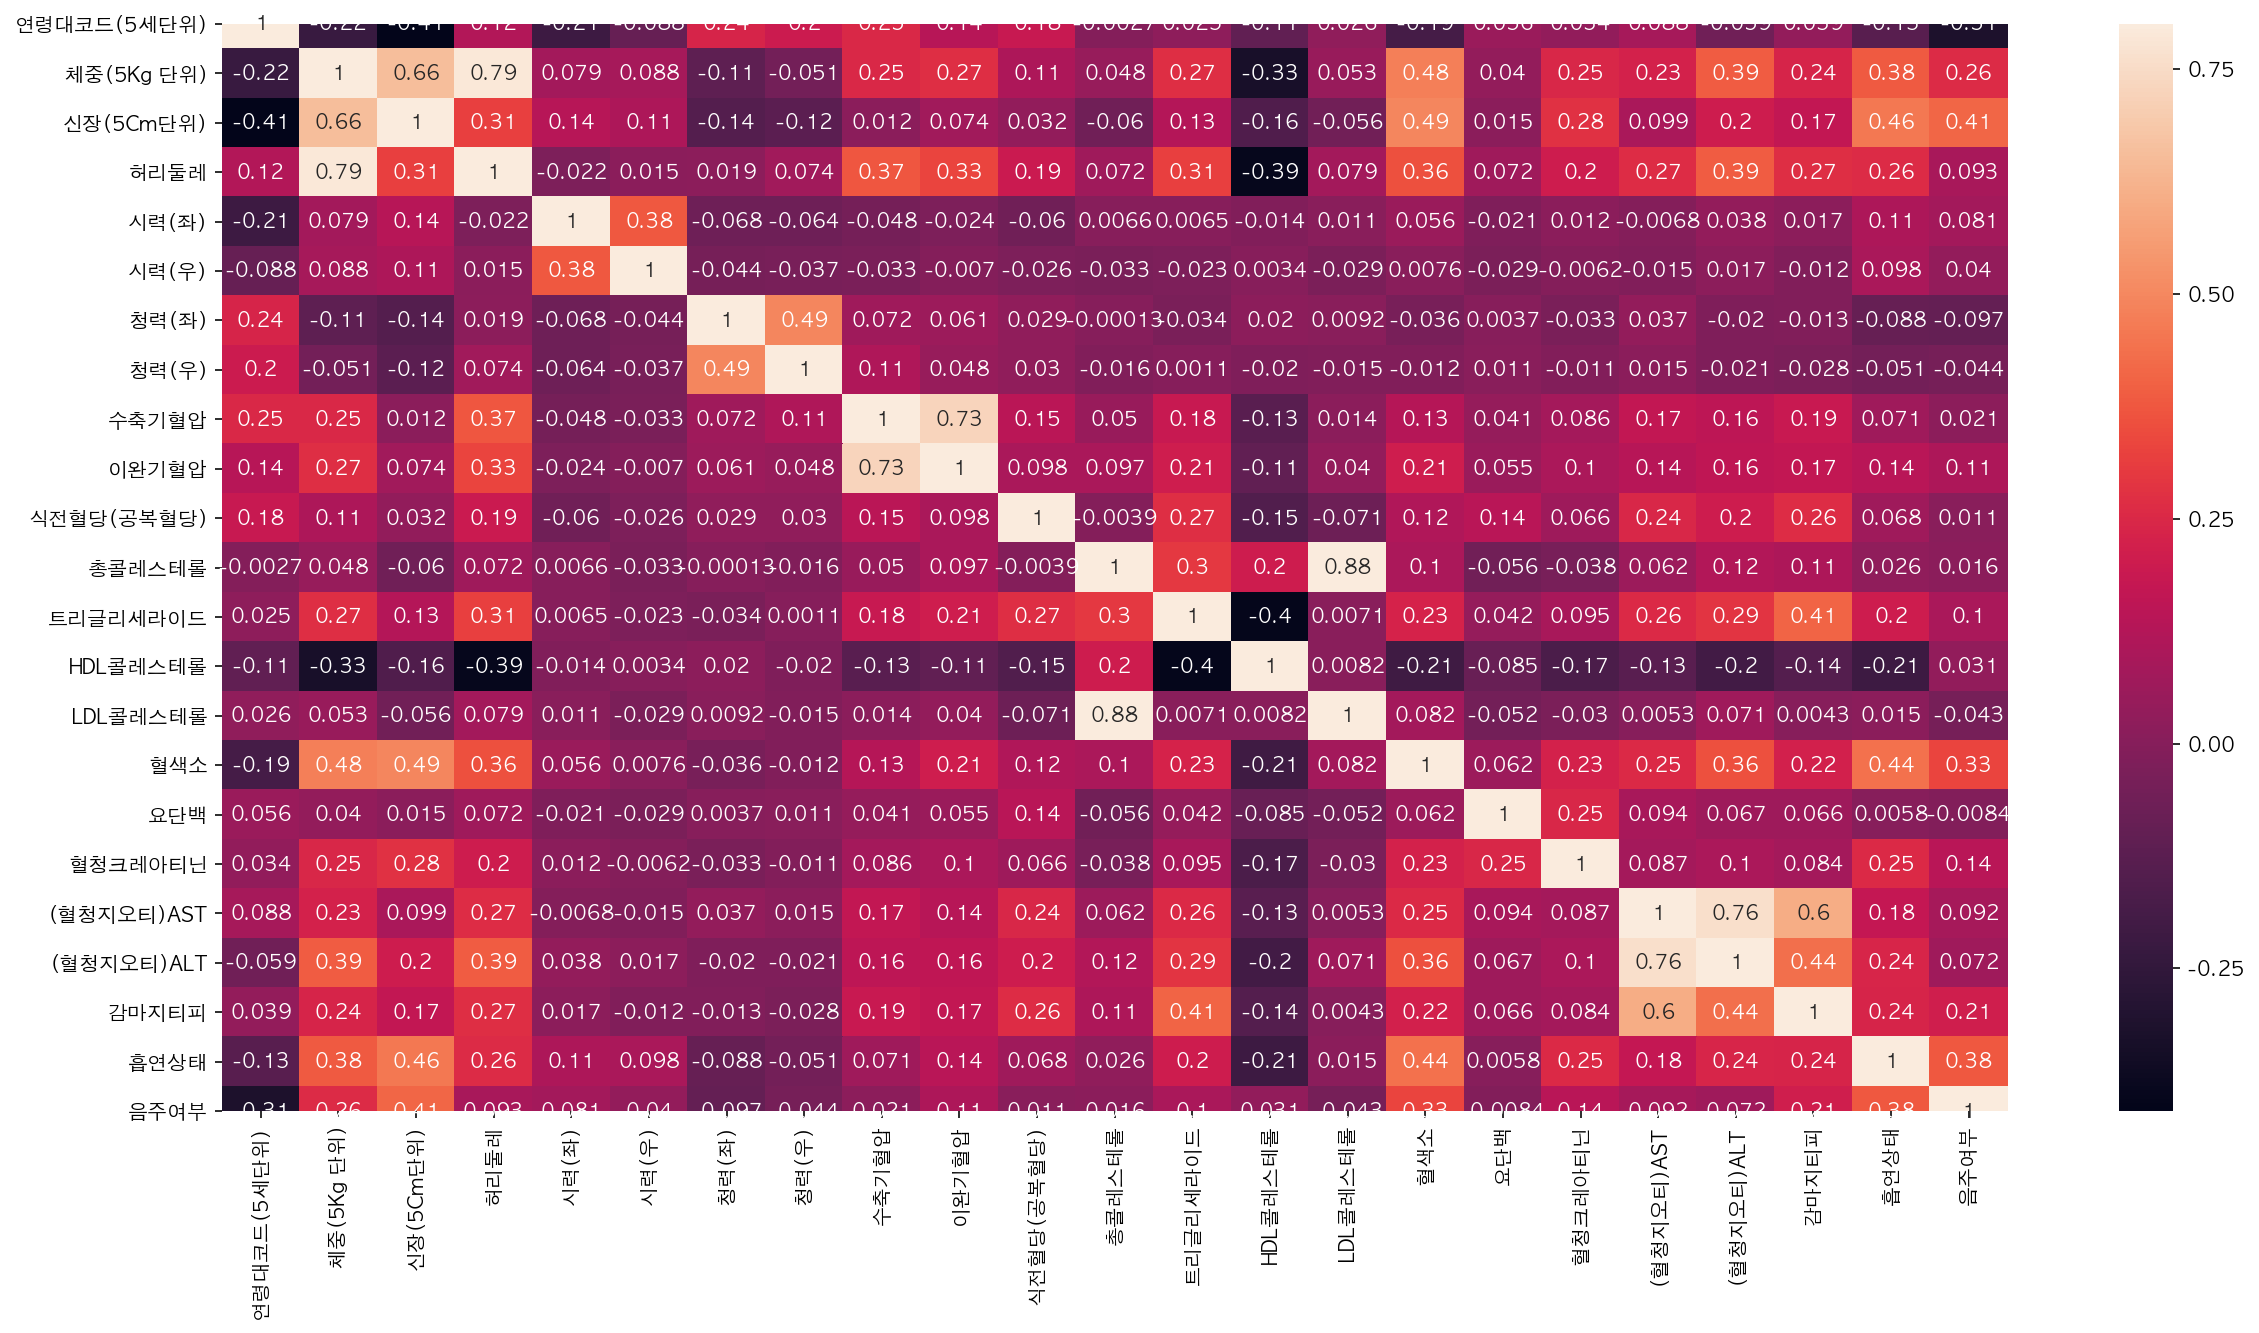

In [93]:
plt.figure(figsize=(20,10))
sns.heatmap(df_corr, vmax=.8, square=False, annot=True)

## 간 기능
* [간기능 검사 - 위키백과, 우리 모두의 백과사전](https://ko.wikipedia.org/wiki/%EA%B0%84%EA%B8%B0%EB%8A%A5_%EA%B2%80%EC%82%AC)
* [감마지티피(r-GTP) 란? : 네이버 블로그](https://m.blog.naver.com/ace2hk/220366726585)

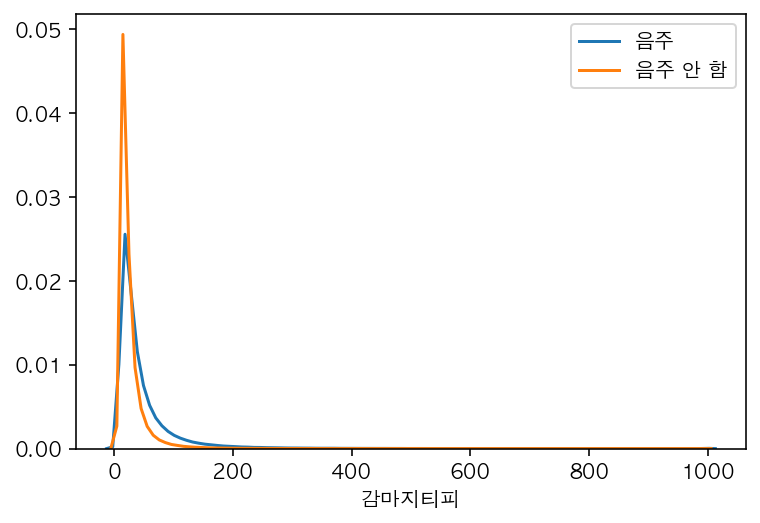

In [94]:
df_GTP = df[df["감마지티피"].notnull()]
df_GTP.head()
sns.distplot(df_GTP.loc[df_GTP["음주여부"] == 1, "감마지티피"], label="음주", hist=False)
sns.distplot(df_GTP.loc[df_GTP["음주여부"] != 1, "감마지티피"], label="음주 안 함", hist=False)

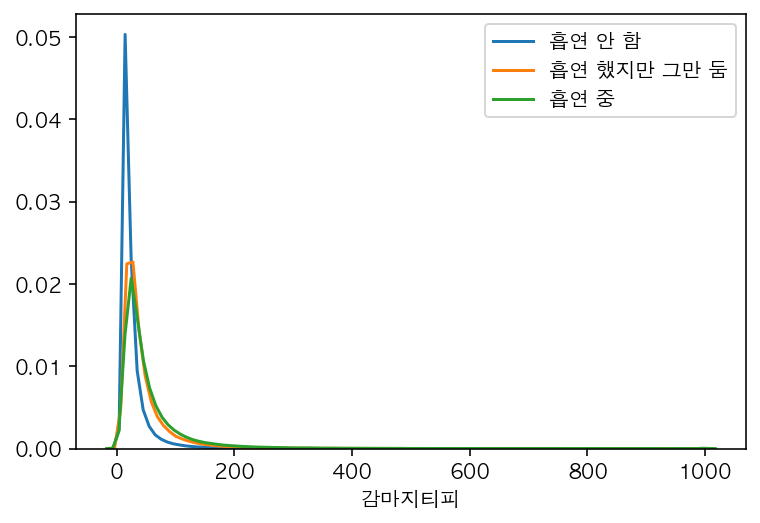

In [95]:
sns.distplot(df_GTP.loc[df_GTP["흡연상태"] == 1, "감마지티피"], 
             label="흡연 안 함", hist=False)
sns.distplot(df_GTP.loc[df_GTP["흡연상태"] == 2, "감마지티피"], 
             label="흡연 했지만 그만 둠", hist=False)
sns.distplot(df_GTP.loc[df_GTP["흡연상태"] == 3, "감마지티피"], 
             label="흡연 중", hist=False)